## 2° PROYECTO INDIVIDUAL - DATA ANALYTICS

### 1) Importación de librerías

In [600]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing
import json

### 2) Lectura de archivo csv como dataframe

In [601]:
df=pd.read_csv('AccidentesAviones.csv') 
df.head() 

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [602]:
# Dimensiones
df.shape

(5008, 18)

### 3) Entendiendo los datos

#### a) Diccionario de datos

Date - Date of accident<br>
Time - Local time, in 24 hr. in the format hh:mm<br>
Location - Location of the accident<br>
Operator - Airline or operator of the aircraft<br>
Flight -  Flight number assigned by the aircraft operator<br>
Route - Complete or partial route flown prior to the accident<br>
Type - Aircraft type<br>
Registration - ICAO registration of the aircraft<br>
cn/In - Construction or serial number / Line or fuselage number<br>
Total Aboard - Total people aboard<br>
Passengers Aboard - Passengers aboard<br>
Crew Aboard - Crew aboard<br>
Total Fatalities - Total fatalities<br>
Passengers Fatalities - Passengers fatalities<br>
Crew Fatalities - Crew fatalities<br>
Ground - Total killed on the ground<br>
Summary - Brief description of the accident and cause if known<br>

In [603]:
df.head(1)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


In [604]:
# Observamos un cambio en la denominación de los campos y por ello decidimos renombrar las columnas 

In [605]:
# Observamos un cambio en la denominación de los campos y por ello decidimos renombrar y normalizar nombres de las columnas
df.rename(columns={ 'fecha': 'date', 
                    'HORA declarada': 'time',
                    'Ruta': 'location',
                    'OperadOR': 'airline_operator',
                    'flight_no': 'flight_no',
                    'ac_type': 'aircraft_type',
                    'registration': 'aircraft_registration',
                    'cn_ln': 'construction_fuselage_number',
                    'all_aboard': 'total_aboard',
                    'PASAJEROS A BORDO': 'passengers_aboard',
                    'crew_aboard': 'crew_aboard',
                    'cantidad de fallecidos': 'total_fatalities',
                    'passenger_fatalities': 'passengers_fatalities',
                    'crew_fatalities': 'crew_fatalities',
                    'ground': 'total_killed_ground',
                    'summary': 'summary'
}, inplace=True)
df.head()

,Unnamed: 0,date,time,location,airline_operator,flight_no,route,aircraft_type,aircraft_registration,construction_fuselage_number,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [606]:
# Analizamos las columnas y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    5008 non-null   int64 
 1   date                          5008 non-null   object
 2   time                          5008 non-null   object
 3   location                      5008 non-null   object
 4   airline_operator              5008 non-null   object
 5   flight_no                     5008 non-null   object
 6   route                         5008 non-null   object
 7   aircraft_type                 5008 non-null   object
 8   aircraft_registration         5008 non-null   object
 9   construction_fuselage_number  5008 non-null   object
 10  total_aboard                  5008 non-null   object
 11  passengers_aboard             5008 non-null   object
 12  crew_aboard                   5008 non-null   object
 13  total_fatalities  

In [607]:
# Observamos que no hay nulos pero en muchos casos se debe a que tenemos valores (?) en lugar de valores correctos

In [608]:
# Es necesario realizar algunos cambios pero antes analizamos los distintos tipos de datos por columna
for col in df.columns:
  print(df[col].unique())

[   0    1    2 ... 5005 5006 5007]
['September 17, 1908' 'September 07, 1909' 'July 12, 1912' ...
 'June 10, 2021' 'July 04, 2021' 'July 06, 2021']
['1718' '?' '0630' ... '0729' '0722' '1914']
['Fort Myer, Virginia' 'Juvisy-sur-Orge, France'
 'Atlantic City, New Jersey' ... 'Near Pyin Oo Lwin, Myanmar'
 'Patikul, Sulu, Philippines' 'Palana, Russia']
['Military - U.S. Army' '?' 'Military - U.S. Navy' ...
 'South Sudan Supreme Airlines' 'Soloy Helicopters'
 'Kamchatka Aviation Enterprise']
['?' 'F-AIKG' '7' '599' '6' '4' '1' '14' '34' '23' '15A' 'LZ 129' '2' '8'
 '9' '229' '19' '16' '21' '3' '203' '5' '71' '7208' '28' 'V-1104' '9035'
 '777' '63' '218' '-' '13' '161' '6001' '142' '45' '216' '42' '105' '16B'
 '6-103' '513' '878' '850' '942' '404' '44' '115' '140' '48' '6963' '2207'
 '665' '521' '605' '410' '121' '311' '608' '1629' '923' '10' '009' '572'
 '611' '700' '4422' '1-10' '624' '343' '072' '421' '331' '060' '6427'
 '100' '897R' '557' '11-8' '537' '157' '500' '307' '2501' '903' '32

##### b) Eliminación de columnas innecesarias

In [609]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'location', 'airline_operator',
       'flight_no', 'route', 'aircraft_type', 'aircraft_registration',
       'construction_fuselage_number', 'total_aboard', 'passengers_aboard',
       'crew_aboard', 'total_fatalities', 'passengers_fatalities',
       'crew_fatalities', 'total_killed_ground', 'summary'],
      dtype='object')

In [610]:
# Eliminamos las siguientes columnas por no considerarlas relevantes para nuestro análisis
df.drop(columns=['Unnamed: 0', 'aircraft_registration', 'construction_fuselage_number', 'total_killed_ground'], inplace = True)
df.columns

Index(['date', 'time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'total_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passengers_fatalities', 'crew_fatalities',
       'summary'],
      dtype='object')

In [611]:
df.head(2)

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,2,1,1,1,1,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,1,0,1,1,0,0,Eugene Lefebvre was the first pilot to ever be...


In [612]:
df.shape

(5008, 14)

##### c) Transformaciones

Fecha

In [613]:
# Comenzamos con la columna 'date'
df.date.unique()

array(['September 17, 1908', 'September 07, 1909', 'July 12, 1912', ...,
       'June 10, 2021', 'July 04, 2021', 'July 06, 2021'], dtype=object)

In [614]:
from datetime import datetime
# Función de conversión
def convertir_fecha(fecha):
    fecha_objeto = datetime.strptime(fecha, '%B %d, %Y')
    fecha_transformada = fecha_objeto.strftime('%Y-%m-%d')
    return fecha_transformada

# Aplicamos la conversión a la columna 'date'
df['date'] = df['date'].apply(convertir_fecha)

In [615]:
# Reemplazamos los valores nulos por un valor vacío
df['date'] = df['date'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['date'] = df['date'].str.replace('?', '')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\2521802366.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['date'] = df['date'].str.replace('?', '')


In [616]:
# Cambiamos el campo 'date' al tipo fecha
df['date'] = pd.to_datetime(df['date'])
df.date.info()


<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: date
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


In [617]:
# Controlamos los valores
df.date

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: date, Length: 5008, dtype: datetime64[ns]

Hora

In [618]:
# Trabajamos sobre la columna 'time'
df.time.unique()

array(['1718', '?', '0630', ..., '0729', '0722', '1914'], dtype=object)

In [619]:
# Agregamos ':' entre los números en la columna 'time'
df['time'] = df['time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [620]:
# Reemplazamos los valores nulos por un valor vacío
df['time'] = df['time'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['time'] = df['time'].str.replace('?', '')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\2736500548.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['time'] = df['time'].str.replace('?', '')


In [621]:
# Controlamos
df.time

0       17:18
1            
2       06:30
3            
4       18:30
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: time, Length: 5008, dtype: object

In [622]:
# Obtenemos los valores únicos de la columna 'time'
valores_unicos = df['time'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17:18

06:30
18:30
10:30
01:00
15:20
23:45
05:15
08:45
07:00
07:45
21:30
10:00
16:55
12:15
17:40
11:40
13:15
16:45
13:42
17:30
c 18:00
c 02:30
c 12:00
05:30
09:30
15:27
c 13:15
08:00
08:30
04:05
14:48
c 11:00
c 9:15
11:30
c 10:00
10:45
17:00
09:18
11:45
21:00
11:01
18:00
10:10
09:35
c 17:00
18:23
c:17:00
15:00
c 15:45
02:05
09:45
c: 2:00
22:40
13:00
23:30
22:30
09:00
08:40
20:00
04:00
06:48
05:45
c 16:00
02:00
19:30
12:00
c 08:00
00:10
c:09:00
06:00
02:07
20:07
14:30
12:30
07:40
03:15
15:40
11:20
22:35
16:00
c 13:00
18:15
14:15
05:00
11:00
09:50
22:45
10:50
23:42
07:30
03:33
02:52
19:00
00:45
15:18
03:30
18:35
22:25
14:36
09:40
14:20
20:18
20:08
23:00
09:55
02:19
19:40
04:40
19:15
19:32
03:52
19:10
10:20
05:20
22:00
03:00
14:00
03:38
10:47
03:14
03:23
20:47
19:38
11:07
20:50
13:40
18:40
19:25
10:40
12:25
04:23
16:50
15:30
15:07
08:03
c 20:40
04:45
14:07
22:17
02:56
04:11
c 23:00
13:45
18:41
00:51
07:55
c 09:00
16:30
21:15
07:59
13:17
09:25
16:20
18:50
16:35
14:10
08:15
13:20
10:15
14:4

In [623]:
# Normalizamos para quedarnos solamente con la hora

def extract_digits(value):
    if pd.isnull(value):  # Comprobar si el valor es nulo
        return value
    digits = ''.join(filter(str.isdigit, value))  # Filtrar solo los dígitos del valor
    return digits[:2] if len(digits) >= 2 else digits

# Aplicamos la función
df['time'] = df['time'].apply(extract_digits)

In [624]:
# Obtenemos los valores únicos de la columna 'time'
valores_unicos = df['time'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17

06
18
10
01
15
23
05
08
07
21
16
12
11
13
02
09
04
14
91
20
22
19
00
03
90
24


In [625]:
# Volvemos a normalizar
def replace_values(value):
    if pd.isnull(value):  # Comprobar si el valor es nulo
        return value
    value = value.replace('91', '09').replace('90', '09').replace('24', '00')
    return value

# Aplicamos la función
df['time'] = df['time'].apply(replace_values)

In [626]:
# Controlamos
valores_unicos = df['time'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17

06
18
10
01
15
23
05
08
07
21
16
12
11
13
02
09
04
14
20
22
19
00
03


Países

In [627]:
# Trabajamos sobre la columna 'location'
df.location.unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

In [628]:
df.location.nunique()

4125

In [629]:
# Es necesario reducir la cantidad de lugares por lo que haremos un análisis de las palabras que más se repiten

In [630]:
# Reemplazamos los valores nulos por un valor vacío
df['location'] = df['location'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['location'] = df['location'].str.replace('?', '')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\1000283751.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['location'] = df['location'].str.replace('?', '')


In [631]:
#pip install wordcloud

In [632]:
#pip install PIL

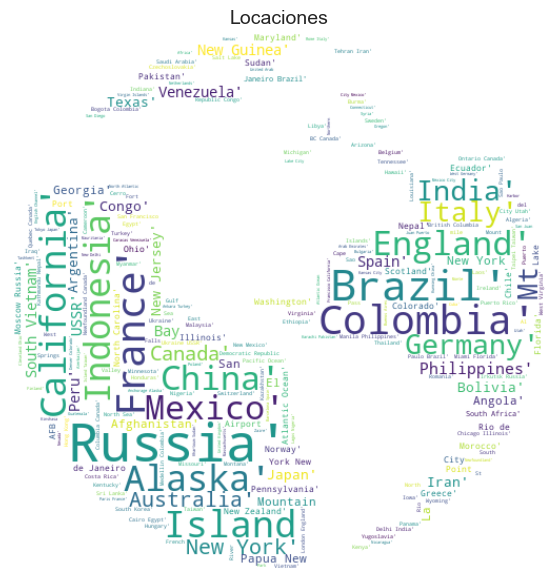

In [633]:
# Observamos una nube de palabras para ver las locaciones que más se repiten
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.location.tolist())
globe_mask = np.array(Image.open('world.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Locaciones', loc='Center', fontsize=14)
plt.show()

In [634]:
# Modificaremos la columna 'location' para extraer el país en función a las coincidencias con la siguiente lista

In [635]:
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [636]:
# Definimos la función que colocará los valores en 'country'
# Si no encuentra coincidencia en 'location' colocará 'other'

def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'other'

# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
df['country'] = df['location'].apply(obtener_pais)


In [637]:
# Observamos que muchos de los valores corresponden a estados de los Estados Unidos

# Lista de estados de los Estados Unidos
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Reemplazamos en  'country' el valor 'other' por 'United States' si 'location' contiene un estado de los Estados Unidos
df.loc[df['location'].str.contains('|'.join(states_usa), case=False, na=False), 'country'] = 'United States'

In [638]:
# Separamos vuelos considerando si la aeronave colisionó en agua o suelo

import re

# Definimos una función para asignar valores a la columna 'surface'
def assign_surface(location):
    if re.search(r'\bsea\b|\bocean\b|\briver\b|\bchannel\b|\bover\b', location, flags=re.IGNORECASE):
        return 'water'
    else:
        return 'ground'

# Creamos la columna 'surface' para identificar vuelos con accidentes en tierra o mar
df['surface'] = df['location'].apply(assign_surface)

In [639]:
df.country.unique()

array(['United States', 'France', 'Canada', 'other', 'Germany', 'Belgium',
       'England', 'Denmark', 'Italy', 'Spain', 'Australia', 'China',
       'Morocco', 'United Kingdom', 'Oman', 'Russia', 'Colombia',
       'Hungary', 'Mauritania', 'Slovakia', 'Algeria', 'Finland',
       'Uruguay', 'Brazil', 'Netherlands', 'Greece', 'Mexico', 'Cuba',
       'Iran', 'Madagascar', 'Argentina', 'New Zealand', 'Bulgaria',
       'South Africa', 'Thailand', 'Iraq', 'Chile', 'Lebanon', 'Bolivia',
       'Ukraine', 'Peru', 'Syria', 'Pakistan', 'Egypt', 'Honduras',
       'Switzerland', 'Panama', 'Poland', 'Sweden', 'Norway', 'Croatia',
       'Tajikistan', 'Libya', 'Gambia', 'Guinea', 'Sudan', 'Samoa',
       'India', 'Tanzania', 'Kenya', 'Japan', 'Mozambique', 'Ecuador',
       'Malta', 'Indonesia', 'Scotland', 'Estonia', 'Puerto Rico',
       'Turkmenistan', 'Kazakhstan', 'Austria', 'Portugal', 'Guyana',
       'Ireland', 'Nicaragua', 'Ivory Coast', 'Philippines', 'Bahamas',
       'Liberia', 'Ni

In [640]:
df.country.nunique()

164

In [641]:
df.surface.unique()

array(['ground', 'water'], dtype=object)

In [642]:
# Filtramos los registros para 'water'
df[df['surface'] == 'water']

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
4,1913-09-09,18,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,water
15,1917-05-14,05,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,"Crashed into the sea from an altitude of 3,000...",other,water
16,1917-06-14,08,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,Shot down by British aircraft.,other,water
20,1918-04-07,21,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,Exploded and crashed into the sea off the sout...,other,water
22,1918-08-11,10,"Ameland Island, North Sea",Military - German Navy,?,?,Zeppelin L-53 (airship),19,?,?,19,?,?,Shot down by british aircraft.,other,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2008-04-28,09,"Off Crimea, Black Sea",Naftogaz,?,?,Mil Mi-8T,20,18,2,20,18,2,The helicopter crashed after the tail section ...,other,water
4729,2009-06-01,00,"Atlantic Ocean, 570 miles northeast of Natal, ...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,228,216,12,228,216,12,The Airbus went missing over the Atlantic Ocea...,Brazil,water
4886,2014-03-08,02,South Indian Ocean,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,239,227,12,239,227,12,Radar contact was lost with the aircraft 2 hou...,India,water
4904,2014-12-28,06,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,162,155,7,162,155,7,The aircraft went missing while en route from ...,other,water


In [643]:
# Ahora tenemos un número razonable para el análisis

In [644]:
# Agrupamos los datos por país y sumamos la cantidad de accidentes
total_accidentes_por_pais = df.groupby('country')['date'].count()

# Excluimos el valor 'other'
total_accidentes_por_pais = total_accidentes_por_pais.drop('other', errors='ignore')

# Obtenemos el top 10 de países por accidentes
top_10_paises = total_accidentes_por_pais.nlargest(10)
top_10_paises

country
United States    1037
Russia            255
Brazil            176
Colombia          150
Canada            133
France            129
India             112
England           101
Indonesia          99
China              98
Name: date, dtype: int64

In [645]:
# Verificamos que nuestra columna 'country' coincide con muchos de los valores observados en la nube de palabras

In [646]:
# Filtramos las filas donde el campo 'country' es igual a 'other'
df_other = df.loc[df['country'] == 'other']
df_other

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
4,1913-09-09,18,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,water
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground
15,1917-05-14,05,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,"Crashed into the sea from an altitude of 3,000...",other,water
16,1917-06-14,08,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,Shot down by British aircraft.,other,water
20,1918-04-07,21,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,Exploded and crashed into the sea off the sout...,other,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,2013-11-29,13,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,The airliner crashed into Bwabwata National Pa...,other,ground
4904,2014-12-28,06,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,162,155,7,162,155,7,The aircraft went missing while en route from ...,other,water
4954,2017-07-10,16,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,"While en route, the Marine Corps transport suf...",other,ground
4959,2017-12-13,18,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,"Shortly after taking off, the aircraft lost al...",other,ground


In [647]:
# Filtramos registros donde la superficie sea 'ground' y 'other' en país

df[(df['surface'] == 'ground') & (df['country'] == 'other')]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground
32,1919-12-11,,"Catherham, Surrey, UK",Aircraft Travel Transport,?,Paris - Hounslow,de Havilland DH-4,1,1,1,1,1,1,Crashed in a field while attemptting to land.,other,ground
39,1920-07-20,,"Cartagena, Columbia",Compañia Colombiana de Navegación Aérea,?,?,Farman F-40,1,1,1,1,1,1,Crashed while taking off after engine failure....,other,ground
51,1921-02-03,,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,1,0,1,1,0,1,Shortly after takeoff from Minneapolis-World C...,other,ground
53,1921-02-15,,Off Gibraltar,Aeropostale,?,?,Breguet 14,2,0,2,2,0,2,The mail fligh encountered poor weather condit...,other,ground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,2013-07-07,11,"Soldotna, Alaksa",Rediske Air,?,Soldotna - Bear Lodge,de Havilland Canada DHC-3T,10,9,1,10,9,1,As soon as the plane took off speed began to d...,other,ground
4879,2013-11-29,13,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,The airliner crashed into Bwabwata National Pa...,other,ground
4954,2017-07-10,16,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,"While en route, the Marine Corps transport suf...",other,ground
4959,2017-12-13,18,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,"Shortly after taking off, the aircraft lost al...",other,ground


In [648]:
# No representan una gran cantidad dentro del dataset y por lo general corresponen a valores mal escritos. 
# Ya tenemos nuestra columna 'country' con los países más representativos del dataset.

Operador-Aerolínea / Categoría


In [649]:
# Analizamos operadores de aerolíneas
df.airline_operator.unique()

array(['Military - U.S. Army', '?', 'Military - U.S. Navy', ...,
       'South Sudan Supreme Airlines', 'Soloy Helicopters',
       'Kamchatka Aviation Enterprise'], dtype=object)

In [650]:
# Reemplazamos los valores nulos por un valor vacío
df['airline_operator'] = df['airline_operator'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['airline_operator'] = df['airline_operator'].str.replace('?', '')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\3945656367.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['airline_operator'] = df['airline_operator'].str.replace('?', '')


In [651]:
# Obtenemos los valores únicos de la columna 'airline_operator'
valores_unicos = df['airline_operator'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Military - U.S. Army

Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varney A

In [652]:
df.airline_operator.nunique()

2268

In [653]:
# Creamos una nube de palabras para observar las palabras que más se repiten

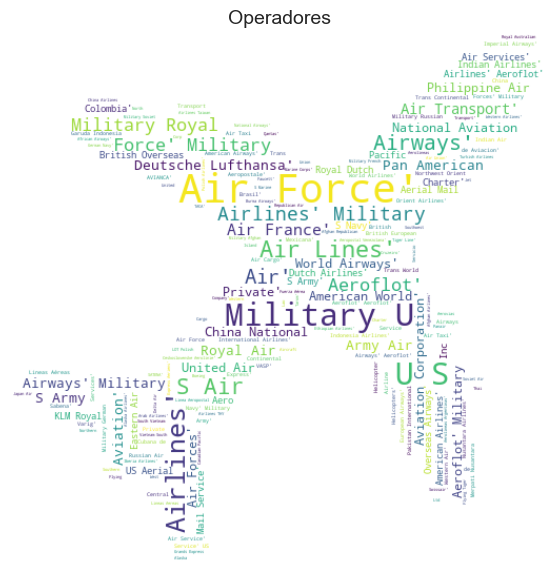

In [654]:
# Basada en operador o aeronave

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.airline_operator.tolist())
plane_mask = np.array(Image.open('plane.png'))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Operadores', loc='Center', fontsize=14)
plt.show()

In [655]:
# Observamos gran presencia de vuelos militares dentro del campo (palabras como 'military', 'air force', 'Army')

In [656]:
# Verificamos si alguna de las palabras clave está presente en la columna 'airline_operator'
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

# Creamos la nueva columna y separamos los vuelos por Militar y No militar
df['category'] = np.where(df['airline_operator'].str.contains('|'.join(keywords), case=False), 'military', 'non-military')

In [657]:
# Controlamos
df_grouped = df['category'].value_counts()
df_grouped

non-military    4217
military         791
Name: category, dtype: int64

Número de vuelo

In [658]:
df.flight_no.unique()

array(['?', 'F-AIKG', '7', '599', '6', '4', '1', '14', '34', '23', '15A',
       'LZ 129', '2', '8', '9', '229', '19', '16', '21', '3', '203', '5',
       '71', '7208', '28', 'V-1104', '9035', '777', '63', '218', '-',
       '13', '161', '6001', '142', '45', '216', '42', '105', '16B',
       '6-103', '513', '878', '850', '942', '404', '44', '115', '140',
       '48', '6963', '2207', '665', '521', '605', '410', '121', '311',
       '608', '1629', '923', '10', '009', '572', '611', '700', '4422',
       '1-10', '624', '343', '072', '421', '331', '060', '6427', '100',
       '897R', '557', '11-8', '537', '157', '500', '307', '2501', '903',
       '32', '245', '83', '493', '129', '151', '610', '615', 'CAM5763',
       '44-2', '501', '324', '6780', '101', '4-2', '526A', '416W', '202',
       '251', '201', '376', '841', '1-6-6A', '470', '162', '636',
       '783/057', '318', '18', '512', '723', '627', '783', '304/44',
       '270', '781', '314', '152', '971', '633', '136', '57', '792',
      

In [659]:
# Reemplazamos los valores nulos por un valor vacío
df['flight_no'] = df['flight_no'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['flight_no'] = df['flight_no'].str.replace('?', '')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\1749766197.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['flight_no'] = df['flight_no'].str.replace('?', '')


In [660]:
# Obtenemos los valores únicos de la columna 'flight_no'
valores_unicos = df['flight_no'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)


F-AIKG
7
599
6
4
1
14
34
23
15A
LZ 129
2
8
9
229
19
16
21
3
203
5
71
7208
28
V-1104
9035
777
63
218
-
13
161
6001
142
45
216
42
105
16B
6-103
513
878
850
942
404
44
115
140
48
6963
2207
665
521
605
410
121
311
608
1629
923
10
009
572
611
700
4422
1-10
624
343
072
421
331
060
6427
100
897R
557
11-8
537
157
500
307
2501
903
32
245
83
493
129
151
610
615
CAM5763
44-2
501
324
6780
101
4-2
526A
416W
202
251
201
376
841
1-6-6A
470
162
636
783/057
318
18
512
723
627
783
304/44
270
781
314
152
971
633
136
57
792
451
4844-C
329
260
626
591
711
845/26
560
402/46
476
214
24
409
629
17K
976
642
400
253
718 / 2
304
190
701
943
810-9
327
823
411
1800
111
232
844
39
103
285
11
609
543
67
222
736
205
300
607E
258
164
495
466
308
502
601
320
402
75
983
891
514
542
200
1349
1658
315
967
595
371
233
330
2511
20
871
671
710
901
503
207
538
1-11
372
613
698
36
804
830/18
738
375
0005
104
26
081
826/266
S85
651
401
424
548
210
406
897
381
859
511
529
2005
706
201/8
92
153
739/14
7816
56
007
117
902
40
771


In [661]:
df.flight_no.isna().sum()

0

In [662]:
# No se encuentran normalizados los números de vuelo, pero pensando en un dashboard es un dato que nos puede servir

Ruta

In [663]:
# Analizamos las rutas
df.route.unique()

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [664]:
# Reemplazamos los valores nulos por un valor vacío
df['route'] = df['route'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['route'] = df['route'].str.replace('?', '')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\2579569717.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['route'] = df['route'].str.replace('?', '')


In [665]:
# Obtenemos los valores únicos de la columna 'route'
valores_unicos = df['route'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

In [666]:
df.route.nunique()

3839

In [667]:
# Observamos más de 1 valor dentro de las rutas y por ende consideramos que no es posible hacer transformaciones sobre los valores en este paso
# No podemos saber en qué tramo ocurrió el accidente y nos quedaremos solamente con el país y la superficie donde ocurrió el mismo 

Tipo aeronave / Marca

In [668]:
# Analizamos las aeronaves
df.aircraft_type.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [669]:
# Reemplazamos los valores nulos por un valor vacío
df['aircraft_type'] = df['aircraft_type'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['aircraft_type'] = df['aircraft_type'].str.replace('?', '')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\2533959475.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['aircraft_type'] = df['aircraft_type'].str.replace('?', '')


In [670]:
# Analizamos las rutas
df.aircraft_type.nunique()

2469

In [671]:
# Podemos intentar categorizar las aeronaves por marca (50 históricas)

marcas_aeronaves_historicas = ['Wright Brothers', 'Boeing', 'Airbus', 'Lockheed Martin', 'McDonnell Douglas',
                              'Northrop Grumman', 'Convair', 'Grumman', 'Vickers', 'De Havilland', 'Hawker',
                              'Avro', 'Fokker', 'Junkers', 'Douglas Aircraft Company', 'Cessna', 'Piper Aircraft',
                              'Beechcraft', 'Bell Aircraft Corporation', 'Martin Marietta', 'Fairchild Aircraft',
                              'Bristol Aeroplane Company', 'Handley Page', 'Curtiss-Wright Corporation', 'Saab',
                              'Aérospatiale', 'Tupolev', 'Ilyushin', 'Antonov', 'Yakovlev', 'Sud Aviation',
                              'Dornier', 'Breguet Aviation', 'Messerschmitt', 'Vought', 'Piaggio Aerospace',
                              'Sikorsky Aircraft Corporation', 'Short Brothers', 'Supermarine', 'Avro Canada',
                              'Harbin Aircraft Manufacturing Corporation', 'English Electric',
                              'Mitsubishi Heavy Industries', 'Aichi', 'Nakajima', 'Kawasaki Heavy Industries',
                              'Handley Page', 'Armstrong Whitworth Aircraft', 'Blackburn Aircraft',
                              'Sopwith Aviation Company']


In [672]:
# Función para asignar valores a la columna 'brand'
def assign_brand(aircraft_type):
    for brand in marcas_aeronaves_historicas:
        if any(word.lower() in aircraft_type.lower().split() for word in brand.split()):
            return brand
    return 'other'

# Aplicamos la función a la columna 'aircraft_type' para crear la columna 'brand'
df['brand'] = df['aircraft_type'].apply(assign_brand)

In [673]:
df.tail(2)

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
5006,2021-07-04,11,"Patikul, Sulu, Philippines",Military - Philippine Air Force,,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96,88,8,50,?,?,"While attempting to land at Jolo Airport, the ...",Philippines,ground,military,Lockheed Martin
5007,2021-07-06,15,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,28,22,6,28,22,6,The passenger plane crashed into the top of a ...,Russia,ground,non-military,Antonov


Total personas

In [674]:
df.total_aboard.isna().sum()

0

In [675]:
df.total_aboard.unique()

array(['2', '1', '5', '20', '28', '41', '19', '22', '23', '21', '24',
       '16', '18', '?', '14', '0', '8', '3', '49', '45', '6', '7', '17',
       '4', '11', '52', '43', '15', '12', '9', '13', '54', '10', '76',
       '83', '50', '25', '97', '29', '36', '34', '37', '35', '26', '39',
       '31', '27', '30', '59', '44', '38', '32', '42', '53', '48', '40',
       '69', '33', '81', '58', '55', '46', '65', '51', '56', '63', '47',
       '70', '57', '115', '129', '66', '67', '74', '64', '128', '80',
       '62', '101', '159', '68', '79', '61', '73', '99', '60', '94', '72',
       '106', '78', '85', '122', '77', '88', '119', '95', '111', '107',
       '132', '112', '84', '105', '86', '118', '87', '103', '127', '153',
       '91', '117', '133', '124', '98', '82', '90', '130', '102', '155',
       '89', '120', '109', '100', '75', '229', '93', '126', '164', '218',
       '121', '92', '104', '156', '108', '174', '176', '202', '113',
       '182', '145', '134', '149', '177', '298', '346', '96'

In [676]:
df.total_aboard.nunique()

245

In [677]:
# Reemplazamos los valores nulos por un valor vacío
df['total_aboard'] = df['total_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['total_aboard'] = df['total_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['total_aboard'] = pd.to_numeric(df['total_aboard'], errors='coerce')


C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\711911882.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_aboard'] = df['total_aboard'].str.replace('?', '')


In [678]:
df.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  nan,  14.,   0.,   8.,   3.,  49.,  45.,   6.,   7.,
        17.,   4.,  11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,
        76.,  83.,  50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,
        39.,  31.,  27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,
        40.,  69.,  33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,
        47.,  70.,  57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,
        62., 101., 159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72.,
       106.,  78.,  85., 122.,  77.,  88., 119.,  95., 111., 107., 132.,
       112.,  84., 105.,  86., 118.,  87., 103., 127., 153.,  91., 117.,
       133., 124.,  98.,  82.,  90., 130., 102., 155.,  89., 120., 109.,
       100.,  75., 229.,  93., 126., 164., 218., 121.,  92., 104., 156.,
       108., 174., 176., 202., 113., 182., 145., 134., 149., 177., 298.,
       346.,  96., 157., 191., 330., 188., 131., 25

In [679]:
df.total_aboard.nunique()

244

In [680]:
# Filtramos el DataFrame para registros con 'total_aboard' vacío
filtered_df = df[df['total_aboard'].isna()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
26,1919-07-21,16,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,,Shuttle,FD Type Dirigible,NaN,?,?,3,2,1,"The dirigible, cruising at 1,200 ft. caught fi...",United States,ground,non-military,other
103,1925-09-07,,"Toul, France",CIDNA,,,Spad 33,NaN,?,?,?,?,?,?,France,ground,non-military,other
347,1934-08-10,,"Ningbo, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,?,China,ground,non-military,Sikorsky Aircraft Corporation
384,1935-08-13,,"Hangow, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,Destoryed in a storm.,China,ground,non-military,Sikorsky Aircraft Corporation
451,1936-12-26,,"Nanking, China",China National Aviation Corporation,,,Douglas DC-2,NaN,?,?,?,?,?,?,China,ground,non-military,McDonnell Douglas
652,1942-10-01,,"Kunming, China",China National Aviation Corporation,,,Douglas C-47,NaN,?,?,?,?,?,Crashed while attempting to land after losing ...,China,ground,non-military,McDonnell Douglas
754,1944-11-09,,"Seljord, Norway",Military - U.S. Army Air Corps,,,,NaN,?,?,?,?,?,?,Norway,ground,military,other
854,1946-03-18,,"Between Chungking and Shanghai, China",China National Aviation Corporation,,Chunking - Shanghai,,NaN,?,?,?,?,?,Disappeared while en route. Plane never located.,China,ground,non-military,other
1231,1951-01-20,,"Huilyo, Peru",Military - TAM,,,Douglas DC-3,NaN,?,?,16,?,?,?,Peru,ground,military,McDonnell Douglas
1362,1952-12-22,,"Damascus, Syria",Syrian Air,,,Douglas DC-3,NaN,?,?,9,?,?,?,Syria,ground,non-military,McDonnell Douglas


In [681]:
# Filtramos el DataFrame para registros con 'total_aboard' igual a 0
filtered_df = df.loc[df['total_aboard'] == 0]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
30,1919-10-20,,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,,,De Havilland DH-4,0.0,0,1,0,0,0,Crashed into the sea while attempting to land ...,other,water,non-military,De Havilland
120,1927-01-12,,"Estaires, France",Fokker,,Delivery flight,Fokker F-VII,0.0,0,2,0,0,2,The flight crew encountered poor weather condi...,France,ground,non-military,Fokker
1121,1949-07-13,,"Jamnagar, Gujarat state, India",Indian Air Force,,Training,Hawker Hunter,0.0,1,1,0,1,1,Crashed into a garage near Jamnagar railway st...,India,ground,military,Hawker
3144,1981-09-22,12,"Near Babaeski, Turkey",Military - Turkish Air Force,,,Northrop F-5A,0.0,0,0,0,0,0,The fighter crashed into a village after the p...,Turkey,ground,military,Northrop Grumman
3376,1986-03-27,,"Bangui, Central African Republic",Military - French Air Force,,,Sepecat Jaguar A,0.0,0,0,0,0,0,The jet fighter crashed into a school shortly ...,Central African Republic,ground,military,other


In [682]:
# Tomamos el criterio de eliminar registros con 'total_aboard' vacío al ser pocos los registros
df = df.dropna(subset=['total_aboard'])

In [683]:
df.total_aboard.isna().sum()

0

In [684]:
# Y también eliminamos los registros donde 'total_aboard' es igual a 0 al ser pocos los registros también
df = df.drop(df[df['total_aboard'] == 0].index)

In [685]:
df.total_aboard.nunique()

243

In [686]:
df.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  14.,   8.,   3.,  49.,  45.,   6.,   7.,  17.,   4.,
        11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,  76.,  83.,
        50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,  39.,  31.,
        27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,  40.,  69.,
        33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,  47.,  70.,
        57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,  62., 101.,
       159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72., 106.,  78.,
        85., 122.,  77.,  88., 119.,  95., 111., 107., 132., 112.,  84.,
       105.,  86., 118.,  87., 103., 127., 153.,  91., 117., 133., 124.,
        98.,  82.,  90., 130., 102., 155.,  89., 120., 109., 100.,  75.,
       229.,  93., 126., 164., 218., 121.,  92., 104., 156., 108., 174.,
       176., 202., 113., 182., 145., 134., 149., 177., 298., 346.,  96.,
       157., 191., 330., 188., 131., 258., 154., 64

Pasajeros

In [687]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['passengers_aboard'] = pd.to_numeric(df['passengers_aboard'], errors='coerce')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\316154471.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['passengers_aboard'] = df['passengers_aboard'].str.replace('?', '')


In [688]:
df.passengers_aboard.isna().sum()

204

Tripulación

In [689]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_aboard'] = df['crew_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['crew_aboard'] = df['crew_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors='coerce')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\2860991533.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['crew_aboard'] = df['crew_aboard'].str.replace('?', '')


In [690]:
df.passengers_aboard.isna().sum()

204

In [691]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_abroad' y 'crew_aboard' son nulos
filtered_df = df[df['passengers_aboard'].isnull() & df['crew_aboard'].isnull()]
filtered_df


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
4,1913-09-09,18,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,?,?,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,?,?,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,?,?,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,?,?,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,,Mi-8,28.0,NaN,NaN,28,?,?,The military helicopter crashed after hitting ...,Tajikistan,ground,military,other
4791,2010-11-25,12,"Strezhevoy, Russia",NARZ,,,Mil Mi-8T,10.0,NaN,NaN,7,?,?,"The helicopter, which was delivering workers t...",Russia,ground,non-military,other
4802,2011-04-19,13,"Tawang, India",Pawan Hans Helicopters Ltd.,,,Mil Mi-172,23.0,NaN,NaN,18,?,?,The helicopter crashed into a hill as it attem...,India,ground,non-military,other
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,?,?,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing


In [692]:
# No haremos modificaciones pero debemos considerar que probablemente no podamos analizar para dichos registros esas características porque tenemos datos faltantes

Total fatalidades

In [693]:
# Reemplazamos los valores nulos por un valor vacío
df['total_fatalities'] = df['total_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['total_fatalities'] = df['total_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['total_fatalities'] = pd.to_numeric(df['total_fatalities'], errors='coerce')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\849283715.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_fatalities'] = df['total_fatalities'].str.replace('?', '')


In [694]:
df.total_fatalities.isna().sum()

0

Fatalidades en pasajeros

In [695]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_fatalities'] = df['passengers_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['passengers_fatalities'] = df['passengers_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['passengers_fatalities'] = pd.to_numeric(df['passengers_fatalities'], errors='coerce')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\2486892054.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['passengers_fatalities'] = df['passengers_fatalities'].str.replace('?', '')


In [696]:
df.passengers_fatalities.isna().sum()

221

Fatalidades en tripulación

In [697]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\1505691742.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['crew_fatalities'] = df['crew_fatalities'].str.replace('?', '')


In [698]:
df.crew_fatalities.isna().sum()

220

In [699]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_fatalities' y 'crew_fatalities' son nulos
filtered_df = df[df['passengers_fatalities'].isnull() & df['crew_fatalities'].isnull()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
4,1913-09-09,18,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,NaN,NaN,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,NaN,NaN,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,NaN,NaN,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,NaN,NaN,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,NaN,NaN,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing
4833,2012-03-16,10,"Kabul, Afghanistan",Military - Turkish Army (NATO),,,Sikorsky S-70A-28,12.0,NaN,NaN,12,NaN,NaN,The helicopter crashed on the outskirts of Kab...,Afghanistan,ground,military,Sikorsky Aircraft Corporation
4848,2012-10-07,12,"Near Omdurman, Sudan",Military - Sudanese Air Force,,,Antonov An-12BP,22.0,16.0,6.0,15,NaN,NaN,"The transport, carrying military personnel and...",Sudan,ground,military,Antonov
4894,2014-07-07,07,"Thach That district, Vietnam",Military - Vietnam People's Army Air Force,,Training,Mil Mi-171,19.0,21.0,2.0,18,NaN,NaN,The helicopter crashed about 40 km west of Ha...,Vietnam,ground,military,other


In [700]:
# No haremos modificaciones pero debemos considerar que probablemente no podamos analizar para dichos registros para esas características porque tenemos datos faltantes

Sobrevivientes

In [701]:
# Calculamos la cantidad de sobrevivientes para cada vuelo

df['survivors'] = df['total_aboard'] - df['total_fatalities']

In [702]:
df.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors
0,1908-09-17,17,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0
1,1909-09-07,,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,0.0
2,1912-07-12,06,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0
3,1913-08-06,,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0
4,1913-09-09,18,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,water,military,other,6.0


In [703]:
# Volvemos a mirar la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4986 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4986 non-null   datetime64[ns]
 1   time                   4986 non-null   object        
 2   location               4986 non-null   object        
 3   airline_operator       4986 non-null   object        
 4   flight_no              4986 non-null   object        
 5   route                  4986 non-null   object        
 6   aircraft_type          4986 non-null   object        
 7   total_aboard           4986 non-null   float64       
 8   passengers_aboard      4782 non-null   float64       
 9   crew_aboard            4784 non-null   float64       
 10  total_fatalities       4986 non-null   int64         
 11  passengers_fatalities  4765 non-null   float64       
 12  crew_fatalities        4766 non-null   float64       
 13  sum

#### d) Tratamiento de valores duplicados

In [704]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors


In [705]:
# No hay duplicados y por ende no realizamos acción alguna

#### e) Tratamiento de valores nulos

In [706]:
df.isna().sum()

date                       0
time                       0
location                   0
airline_operator           0
flight_no                  0
route                      0
aircraft_type              0
total_aboard               0
passengers_aboard        204
crew_aboard              202
total_fatalities           0
passengers_fatalities    221
crew_fatalities          220
summary                    0
country                    0
surface                    0
category                   0
brand                      0
survivors                  0
dtype: int64

In [707]:
print(f"El porcentaje de valores nulos en pasajeros a bordo es  {round(df['passengers_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en tripulación a bordo es  {round(df['crew_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en pasajeros es  {round(df['passengers_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en tripulación a bordo es  {round(df['crew_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")

El porcentaje de valores nulos en pasajeros a bordo es  4.09%.
El porcentaje de valores nulos en tripulación a bordo es  4.05%.
El porcentaje de valores nulos en fatalidades en pasajeros es  4.43%.
El porcentaje de valores nulos en fatalidades en tripulación a bordo es  4.41%.


In [708]:
# No son representativos en términos proporcionales, pero mantendremos los valores nulos de dichas columnas para no eliminar registros. No obstante no podremos usar dichas columnas

#### f) Nubes de palabras

In [709]:
# Observamos dentro de descripción las palabras más frecuentes

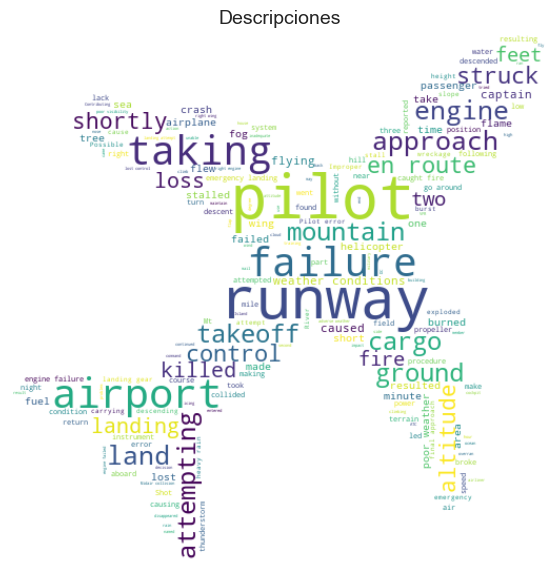

In [710]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.summary.tolist())
plane_mask = np.array(Image.open('plane.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('due')
stopwords.add('hit')
stopwords.add('left')
stopwords.add('ft')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('accident')
stopwords.add('crew')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Descripciones', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

In [711]:
# Dichas palabras podrán servirnos más adelante para hacer algunos análisis

### 4) Análisis descriptivo

#### Medidas descriptivas

In [712]:
df.describe()

,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,survivors
count,4986.000000,4782.000000,4784.000000,4986.000000,4765.000000,4766.000000,4986.000000
mean,31.152427,26.905270,4.523411,22.341957,18.971459,3.591691,8.810469
std,45.492081,44.049904,3.758032,35.035543,34.085492,3.177420,30.653307
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,3.750000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,516.000000


In [713]:
# Tenemos algunos valores que es necesario analizar puesto que según fuentes el número máximo de personas transportadas en un avión es de 525
# A su vez la tripulación como máximo es de un número de 10 personas entre pilotos, copilotos y asistentes de vuelo, aunque puede variar
# Las fatalidades deben analizarse en consecuencia a estos números también

#### Histogramas

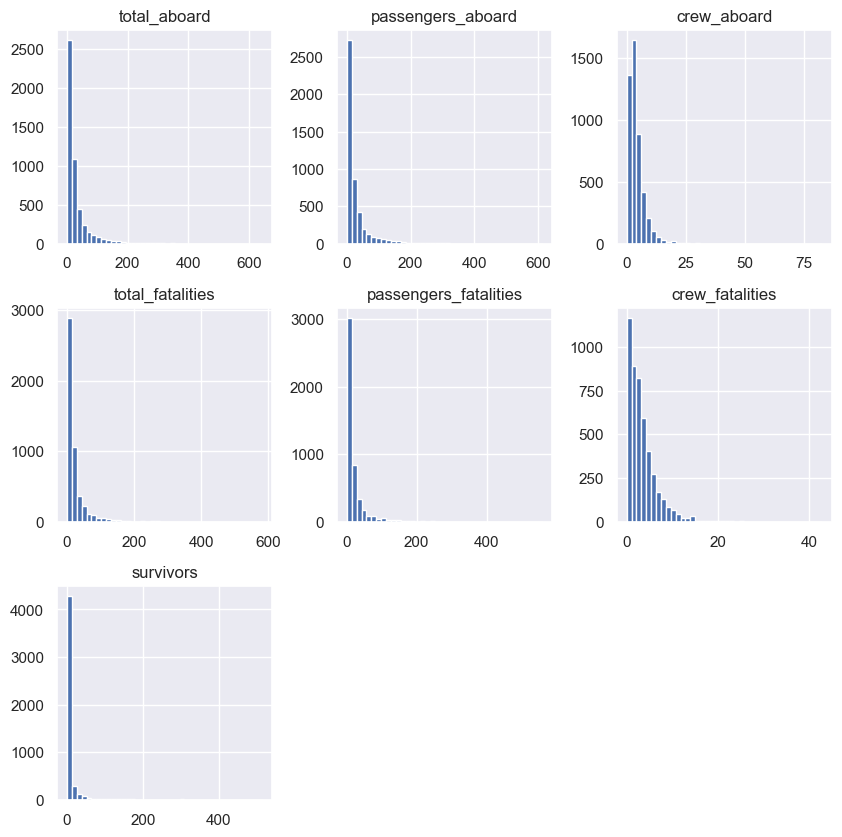

In [714]:
columns = ['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities', 'survivors']
df[columns].hist(bins=40, figsize= (10, 10))
plt.show()

In [715]:
# Todas las distribuciones presentan un gran sesgo a la derecha

#### Outliers

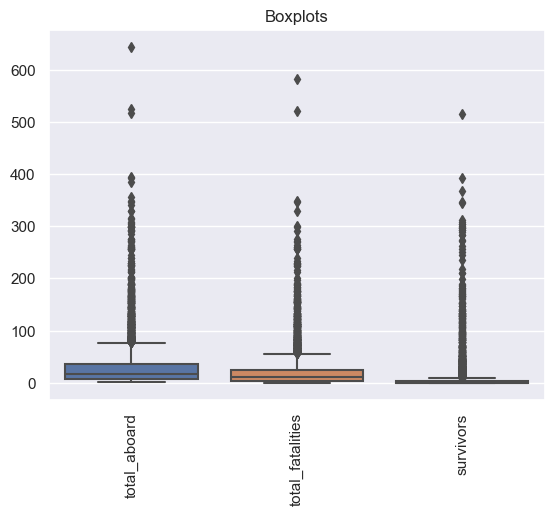

In [716]:
# Graficamos las siguientes variables que podemos utilizar (ya que no tienen valores nulos)

sns.boxplot(data=df[['total_aboard', 'total_fatalities', 'survivors']])
plt.title('Boxplots')
plt.xticks(rotation=90)
plt.show()

In [717]:
# Observamos outliers en total_aboard y total_fatalities que son las columnas que nos interesan

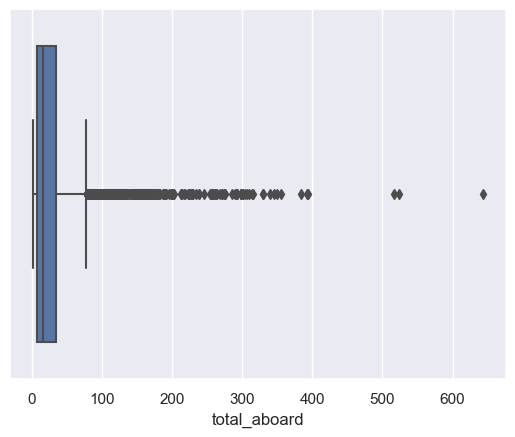

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\4154941744.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['total_aboard'], 25,
C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\4154941744.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['total_aboard'], 75,


El rango intercuartil (IQR) de total_aboard es 28.0
-35.0 77.0


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors
364,1935-02-12,,"Off Point Sur, Californiia",Military - US Navy,,,Goodyear-Zeppelin U.S.S. Macon (airship),83.0,0.0,83.0,2,0.0,2.0,The airship suffered structural failure in a s...,other,ground,military,other,81.0
462,1937-05-06,19,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,LZ 129,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,97.0,36.0,61.0,35,13.0,22.0,The airship Hindenburg caught fire and burned ...,United States,ground,non-military,other,62.0
1116,1949-06-07,00,"San Juan, Puerto Rico",Strato Freight,,San Juan - Miami,Curtiss C-46D-5-CU,81.0,75.0,6.0,53,52.0,1.0,The aircraft crashed into the Atlantic Ocean d...,Puerto Rico,ground,non-military,other,28.0
1165,1950-03-12,14,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,other,ground,non-military,Avro,3.0
1360,1952-12-20,06,"Moses Lake, Washington",Military - U.S. Air Force,,,Douglas C-124A Globemaster,115.0,105.0,10.0,87,82.0,5.0,Within two minutes after takeoff the aircraft ...,United States,ground,military,McDonnell Douglas,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2020-01-08,06,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,ground,non-military,Boeing,0.0
4995,2020-02-05,18,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,177.0,171.0,6.0,3,3.0,0.0,While landing duriing high winds and heavey ra...,Turkey,ground,non-military,Boeing,174.0
4997,2020-05-22,14,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,ground,non-military,Airbus,2.0
4998,2020-08-07,19,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,190.0,184.0,6.0,20,18.0,2.0,The flight IX344 suffered a runway excursion w...,India,ground,non-military,Boeing,170.0


In [718]:
# Filtramos outliers de total_aboard

sns.boxplot(data = df, x = 'total_aboard')
plt.show()

# IQR
Q1 = np.percentile(df['total_aboard'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_aboard'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_aboard es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['total_aboard']<lower_lim) | (df['total_aboard']>upper_lim)]

In [719]:
# Son muchos registros por lo que analizamos la conveniencia de filtrar vuelos de más de 500 personas

df[(df['total_aboard']>500)]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors
2902,1977-03-27,17,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,614.0,30.0,583,560.0,23.0,Both aircraft were diverted to Tenerife becaus...,other,ground,non-military,Boeing,61.0
3341,1985-08-12,18,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,524.0,509.0,15.0,520,505.0,15.0,The aircraft suffered an aft pressure bulkhead...,Japan,ground,non-military,Boeing,4.0
4219,1999-07-23,11,"Tokyo, Japan",All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,503.0,14.0,1,0.0,1.0,Two minutes after taking off from Haneda Airpo...,Japan,ground,non-military,Boeing,516.0


In [720]:
# Observamos que se trata de datos correctos. El primer vuelo de la lista fue un choque entre 2 aviones y por ello la cantidad de personas (están sumados los 2 vuelos de la colisión)
# El segundo y tercer registro son correctos también

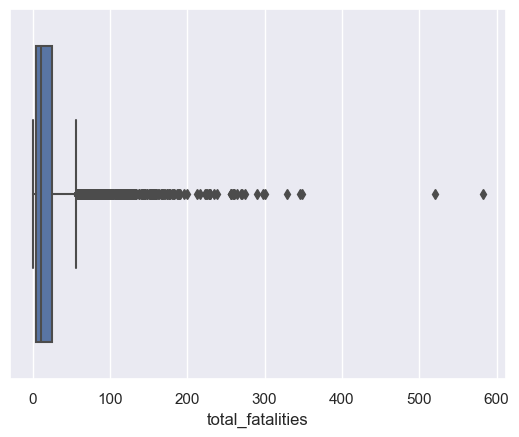

El rango intercuartil (IQR) de total_fatalities es 21.0
-27.5 56.5


C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\3878107659.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['total_fatalities'], 25,
C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\3878107659.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['total_fatalities'], 75,


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors
311,1933-04-04,12,"Off Barnegat, New Jersey",Military - U.S. Navy,,,Goodyear-Zeppelin U.S.S. Akron (airship),76.0,NaN,NaN,73,NaN,NaN,"While cruising at 1,600 feet off New Jersey, s...",United States,ground,military,other,3.0
814,1945-10-16,11,"Near Peking, China",Military - U.S. Army Air Forces,,Hankou - Peking,Curtiss-Wright C-46F-CU,59.0,55.0,4.0,59,55.0,4.0,Struck a radio transmission tower while on app...,China,ground,military,Curtiss-Wright Corporation,0.0
1165,1950-03-12,14,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,other,ground,non-military,Avro,3.0
1183,1950-06-23,23,"Lake Michigan, 18 NNW of Benton Harbor, Michigan",Northwest Orient Airlines,2501,New York City - Minneapolis - Spokan -Seattle,Douglas DC-4,58.0,55.0,3.0,58,55.0,3.0,"En route from New York to Minneapolis, the air...",United States,ground,non-military,McDonnell Douglas,0.0
1211,1950-11-13,18,"Mt. Tete de L'Obiou, France",Curtiss-Reid Flying Services Ltd. (Canada),,Rome - Paris,Douglas C-54B-1-DC,58.0,51.0,7.0,58,51.0,7.0,The aircraft drifted 50 miles off the prescrib...,France,ground,non-military,McDonnell Douglas,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,2018-10-29,06,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,189.0,181.0,8.0,189,181.0,8.0,"The airliner crashed into the Jakarta Sea, 13 ...",Indonesia,ground,non-military,Boeing,0.0
4983,2019-03-10,08,"Bishoftu, Ethiopia",Ethiopian Airlines,302,Addis Ababa - Nairobi,Boeing 737 Max 8,157.0,149.0,8.0,157,149.0,8.0,The internationally scheduled airliner crashed...,Ethiopia,ground,non-military,Boeing,0.0
4994,2020-01-08,06,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,ground,non-military,Boeing,0.0
4997,2020-05-22,14,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,ground,non-military,Airbus,2.0


In [721]:
# Filtramos outliers de total_fatalities

sns.boxplot(data = df, x = 'total_fatalities')
plt.show()

# IQR
Q1 = np.percentile(df['total_fatalities'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_fatalities'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_fatalities es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['total_fatalities']<lower_lim) | (df['total_fatalities']>upper_lim)]

In [722]:
# Son muchos registros por lo que evaluamos la conveniencia de filtrar registros en donde tengamos un mayor número de fatalidades que de personas a bordo

df[df['total_fatalities'] > df['total_aboard']]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors


In [723]:
# No tenemos registros por lo que nuestros datos son consistentes

In [724]:
# Por ende no tomaremos ninguna acción respecto a los outliers puesto que son datos válidos para nuestro análisis

#### Gráficos de barras

In [725]:
#Identificamos columnas catégoricas
categorical_data = df.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['date', 'time', 'location', 'airline_operator', 'flight_no', 'route', 'aircraft_type', 'summary', 'country', 'surface', 'category', 'brand']


#### ACCIDENTES

##### Cuántos accidentes estamos analizando?

In [726]:
print('La cantidad de accidentes analizada en el dataset es de', df.shape[0])

La cantidad de accidentes analizada en el dataset es de 4986


In [727]:
df.shape

(4986, 19)

##### Cuál es el país con mayor cantidad de accidentes?

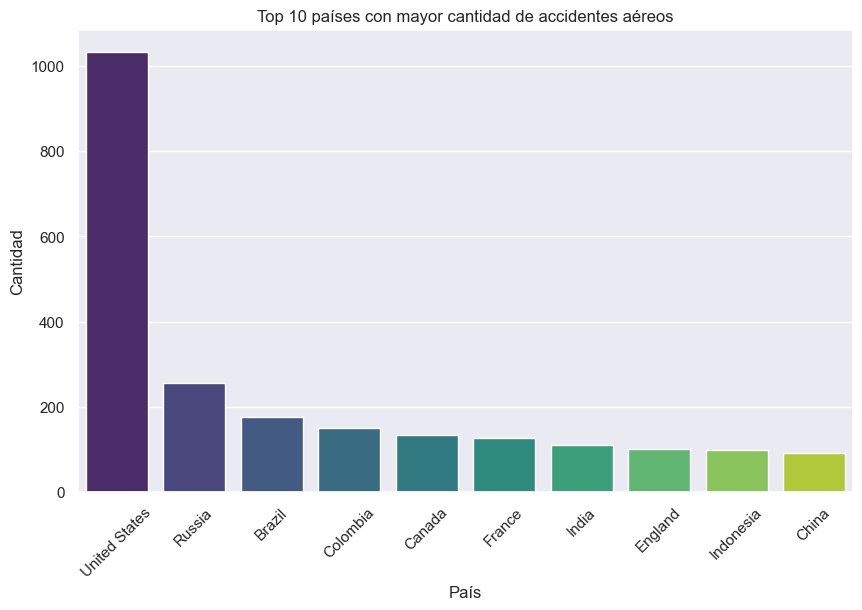

In [728]:
# Filtramos los datos para excluir la categoría 'other'
filtered_data = df[df['country'] != 'other']

# Calculamos el recuento de accidentes por país (tomamos los 10 más representativos)
country_counts = filtered_data['country'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_countries = pd.DataFrame({'Country': country_counts.index, 'Accident Count': country_counts.values})

# Creamos el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Accident Count', data=top_countries, palette='viridis')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [729]:
# Observamos los valores

top_countries

,Country,Accident Count
0,United States,1034
1,Russia,255
2,Brazil,175
3,Colombia,150
4,Canada,133
5,France,127
6,India,111
7,England,101
8,Indonesia,99
9,China,92


In [730]:
# Estados Unidos es el país con mayor cantidad de accidentes históricos

##### Cuál es el operador/aerolínea con mayor cantidad de accidentes?

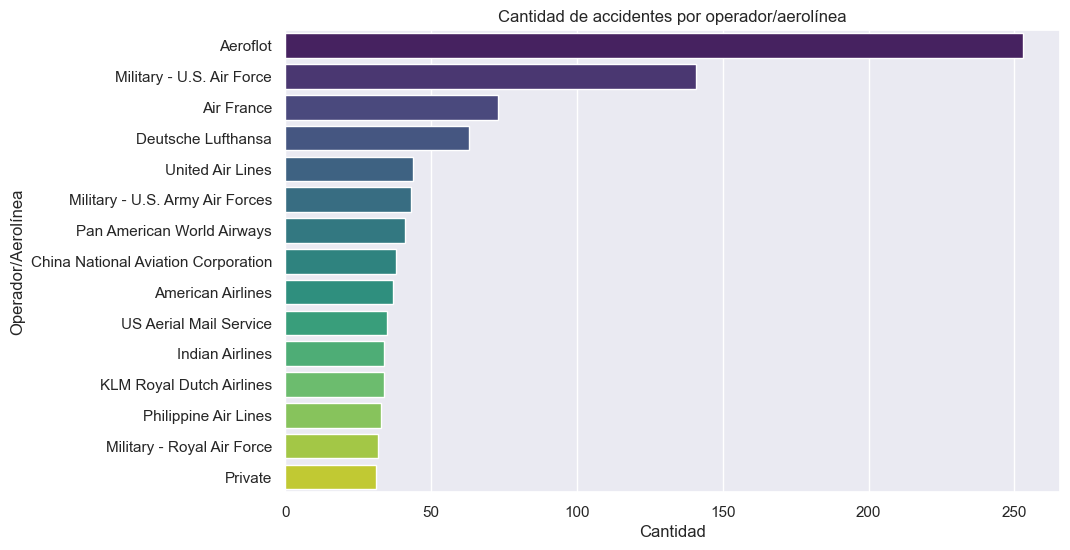

In [731]:
# Calculamos el recuento de accidentes por operador de aerolíneas (tomamos las 15 más representativos)
operator_counts = df['airline_operator'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento
top_operators = pd.DataFrame({'Operator': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Operator', data=top_operators, palette='viridis')
plt.title('Cantidad de accidentes por operador/aerolínea')
plt.xlabel('Cantidad')
plt.ylabel('Operador/Aerolínea')
plt.show()

In [732]:
# Observamos los valores

top_operators

,Operator,Accident Count
0,Aeroflot,253
1,Military - U.S. Air Force,141
2,Air France,73
3,Deutsche Lufthansa,63
4,United Air Lines,44
5,Military - U.S. Army Air Forces,43
6,Pan American World Airways,41
7,China National Aviation Corporation,38
8,American Airlines,37
9,US Aerial Mail Service,35


In [733]:
# En el gráfico podemos observar que Aeroflot tiene la mayor cantidad de accidentes aéreos

##### Cuál es la aeronave con mayor cantidad de accidentes?

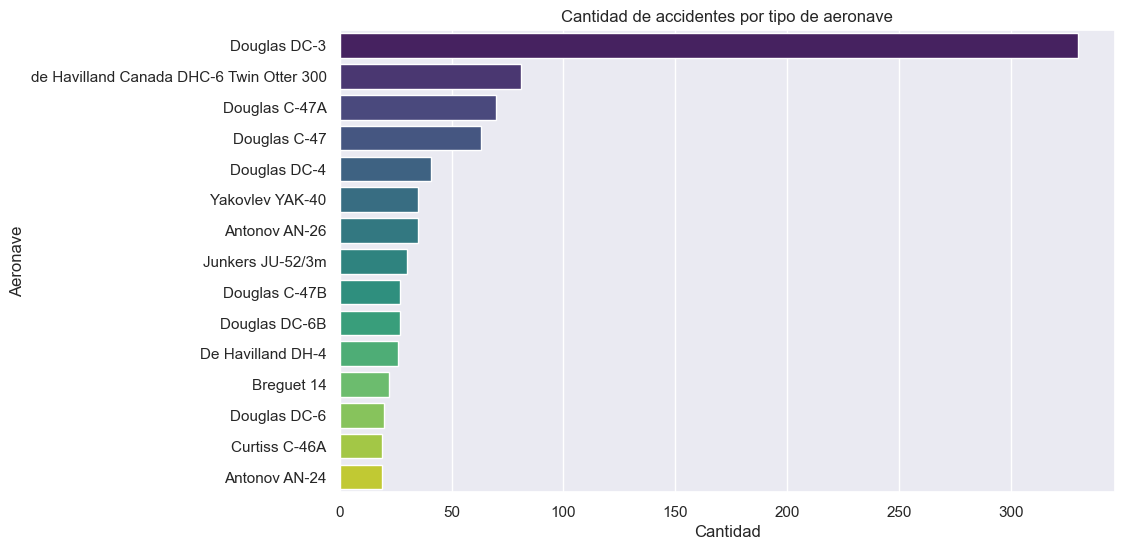

In [734]:
# Calculamos el recuento de accidentes por tipo de aeronave (tomamos las 15 más representativas)
operator_counts = df['aircraft_type'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento 
top_aircrafts = pd.DataFrame({'Aircraft': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Aircraft', data=top_aircrafts, palette='viridis')
plt.title('Cantidad de accidentes por tipo de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Aeronave')
plt.show()

In [735]:
# Observamos los valores

top_aircrafts

,Aircraft,Accident Count
0,Douglas DC-3,330
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,70
3,Douglas C-47,63
4,Douglas DC-4,41
5,Yakovlev YAK-40,35
6,Antonov AN-26,35
7,Junkers JU-52/3m,30
8,Douglas C-47B,27
9,Douglas DC-6B,27


In [736]:
# Observamos que el Douglas DC-3 es la aeronave con mayor cantidad de accidentes. Pero al observar muchos aviones de la marca, realizaremos un análisis 
# por marca para identificar si existe tal patrón

##### Cuál es la marca de aeronave con mayor cantidad de accidentes?

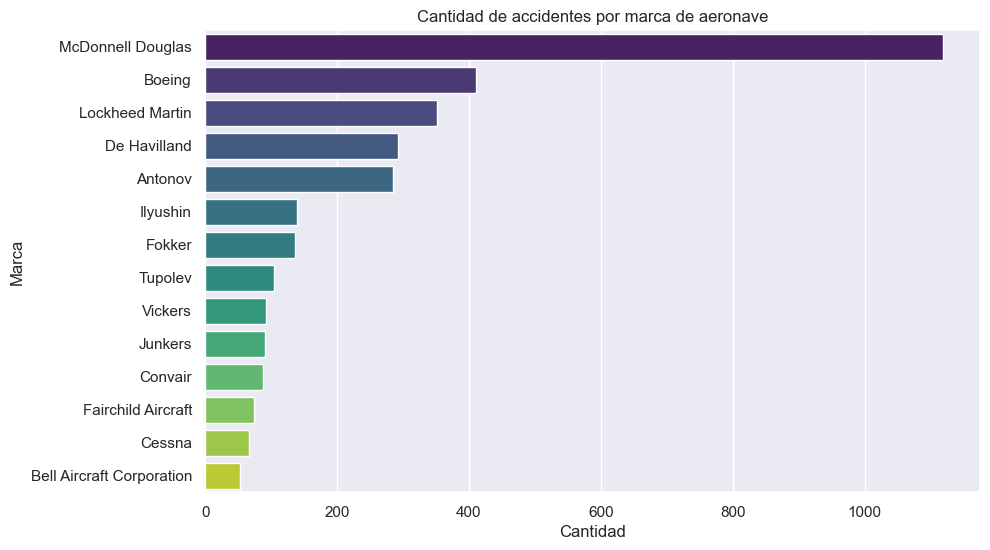

In [737]:
# Calculamos el recuento de accidentes por marca (tomamos las 15 más representativas)
operator_counts = df['brand'].value_counts().head(15)

# Filtrar 'other' del recuento
operator_counts = operator_counts[operator_counts.index != 'other']

# Creamos un DataFrame con los datos de recuento
top_brands = pd.DataFrame({'Brand': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Brand', data=top_brands, palette='viridis')
plt.title('Cantidad de accidentes por marca de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Marca')
plt.show()

In [738]:
# Observamos los valores

top_brands

,Brand,Accident Count
0,McDonnell Douglas,1119
1,Boeing,410
2,Lockheed Martin,351
3,De Havilland,292
4,Antonov,285
5,Ilyushin,140
6,Fokker,137
7,Tupolev,105
8,Vickers,93
9,Junkers,91


In [739]:
# Podemos decir que se mantiene el patrón y que los aviones Douglas resultaron a lo largo de la historia los mas siniestrables. Pero...

# El fabricante de aviones Douglas Aircraft Company, conocido comúnmente como Douglas, dejó de existir como entidad independiente en 1967. 
# En ese año, se fusionó con McDonnell Aircraft Corporation para formar McDonnell Douglas Corporation. 
# A su vez, McDonnell Douglas fue adquirida por The Boeing Company en 1997.'''

##### Qué categoría posee mayor cantidad de accidentes?

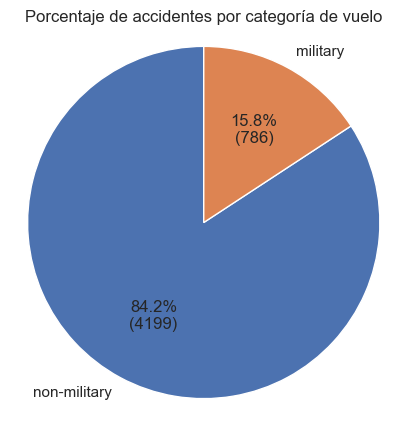

In [740]:
# Calculamos el recuento de accidentes por categoría
category_counts = df['category'].value_counts()

# Creamos el gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*category_counts.sum())})', startangle=90)
plt.title('Porcentaje de accidentes por categoría de vuelo')
plt.axis('equal')
plt.show()

In [741]:
# Observamos los valores

category_counts

non-military    4200
military         786
Name: category, dtype: int64

In [742]:
# Observamos que los vuelos no militares poseen mayor cantidad de accidentes a lo largo de la historia

#### FATALIDADES

Cuál fue el vuelo con mayor fatalidad y qué sucedió en el mismo?

In [743]:
# Obtenemos el índice del vuelo con mayor número de fatalidades
indice_max_fatalidades = df['total_fatalities'].idxmax()

# Obtenemos el número de vuelo, la descripción de lo sucedido y el número de fatalidades correspondientes
num_vuelo_max_fatalidades = df.loc[indice_max_fatalidades, 'flight_no']
descripcion_suceso_max_fatalidades = df.loc[indice_max_fatalidades, 'summary']
num_fatalidades_max_fatalidades = df.loc[indice_max_fatalidades, 'total_fatalities']
operador_max_fatalidades = df.loc[indice_max_fatalidades, 'airline_operator']

# Imprimimos los resultados
print("Número de vuelo con mayor número de fatalidades:", num_vuelo_max_fatalidades)
print("Operador involucrado:", operador_max_fatalidades)
print("Número de fatalidades:", num_fatalidades_max_fatalidades)
print("Descripción de lo sucedido:", descripcion_suceso_max_fatalidades)


Número de vuelo con mayor número de fatalidades: 1736/4805
Operador involucrado: Pan American World Airways / KLM
Número de fatalidades: 583
Descripción de lo sucedido: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety o

##### Qué operador tuvo mayor cantidad de fatalidades?

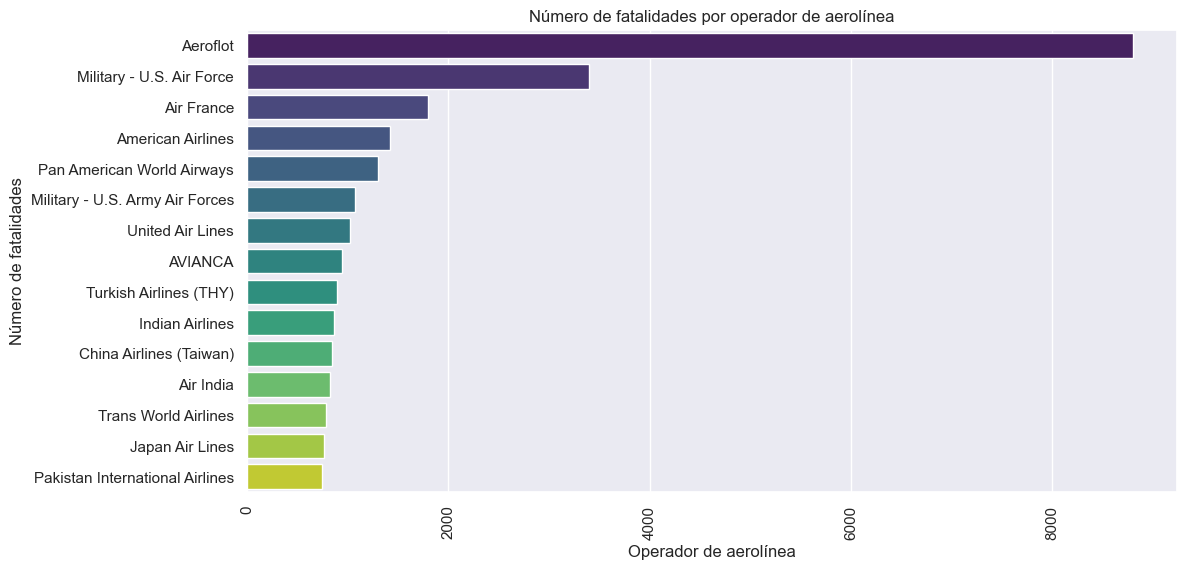

In [744]:
# Agrupamos por operador
fatalities_by_operator = df.groupby('airline_operator')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
fatalities_by_operator = fatalities_by_operator.nlargest(15, 'total_fatalities')

#Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(y='airline_operator', x='total_fatalities', data=fatalities_by_operator, palette='viridis')
plt.xlabel('Operador de aerolínea')
plt.ylabel('Número de fatalidades')
plt.title('Número de fatalidades por operador de aerolínea')
plt.xticks(rotation=90)
plt.show()


In [745]:
# Observamos los valores
fatalities_by_operator

,airline_operator,total_fatalities
80,Aeroflot,8802
1399,Military - U.S. Air Force,3395
188,Air France,1797
353,American Airlines,1422
1594,Pan American World Airways,1303
1409,Military - U.S. Army Air Forces,1070
2143,United Air Lines,1019
22,AVIANCA,941
2108,Turkish Airlines (THY),890
974,Indian Airlines,860


In [746]:
# Aeroflot es la aerolínea con mayor cantidad de fatalidades

##### Qué aeronave presentó mayor cantidad de fatalidades a lo largo de los años?

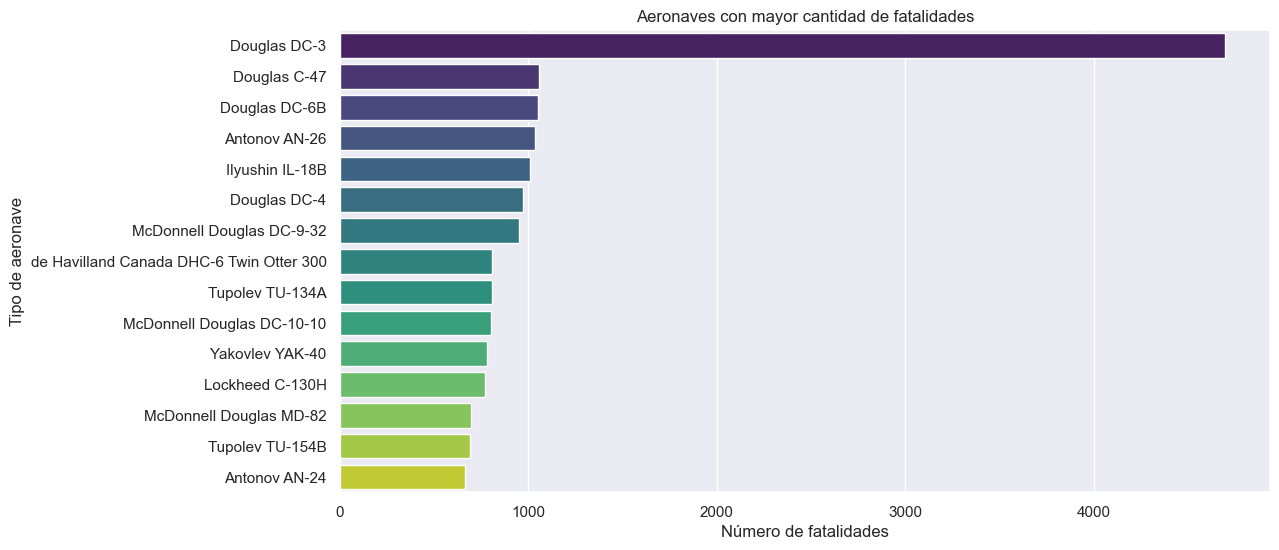

In [747]:
# Agrupamos por tipo de aeronave
fatalities_by_aircraft = df.groupby('aircraft_type')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_aircraft_fatalities = fatalities_by_aircraft.nlargest(15, 'total_fatalities')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='total_fatalities', y='aircraft_type', data=top_aircraft_fatalities, palette='viridis')
plt.xlabel('Número de fatalidades')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de fatalidades')
plt.show()



In [748]:
# Observamos los valores
top_aircraft_fatalities

,aircraft_type,total_fatalities
1129,Douglas DC-3,4699
1030,Douglas C-47,1059
1198,Douglas DC-6B,1051
143,Antonov AN-26,1038
1547,Ilyushin IL-18B,1008
1181,Douglas DC-4,972
1886,McDonnell Douglas DC-9-32,953
2396,de Havilland Canada DHC-6 Twin Otter 300,810
2225,Tupolev TU-134A,807
1850,McDonnell Douglas DC-10-10,804


In [749]:
# El douglas DC-3 presenta la mayor cantidad de fatalidades

##### Qué marca tuvo la mayor cantidad de fatalidades?

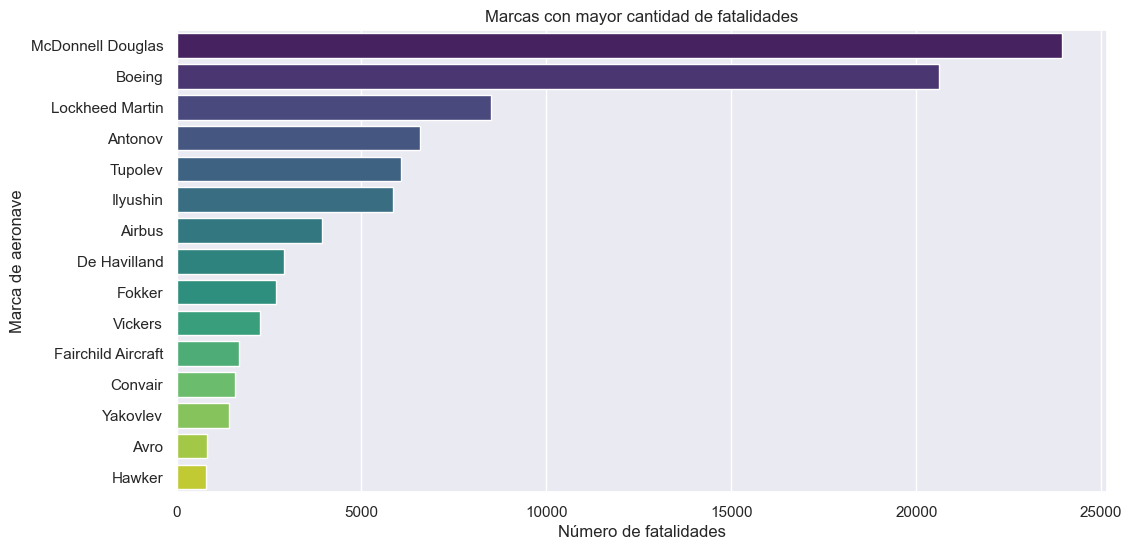

In [750]:
# Filtramos 'other' del recuento
data_filtered = df[df['brand'] != 'other']

# Agrupamos por tipo de marca
fatalities_by_brand = data_filtered.groupby('brand')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_brand_fatalities = fatalities_by_brand.nlargest(15, 'total_fatalities')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='total_fatalities', y='brand', data=top_brand_fatalities, palette='viridis')
plt.xlabel('Número de fatalidades')
plt.ylabel('Marca de aeronave')
plt.title('Marcas con mayor cantidad de fatalidades')
plt.show()


In [751]:
# Observamos los valores
top_brand_fatalities

,brand,total_fatalities
25,McDonnell Douglas,23945
8,Boeing,20614
24,Lockheed Martin,8515
1,Antonov,6573
37,Tupolev,6064
21,Ilyushin,5843
0,Airbus,3922
14,De Havilland,2909
17,Fokker,2701
38,Vickers,2252


In [752]:
# Observamos que Douglas presenta la mayor cantidad de fatalidades

#### RESILIENCIA EN ACCIDENTES

##### Cuáles aerolíneas resultaron más seguras?

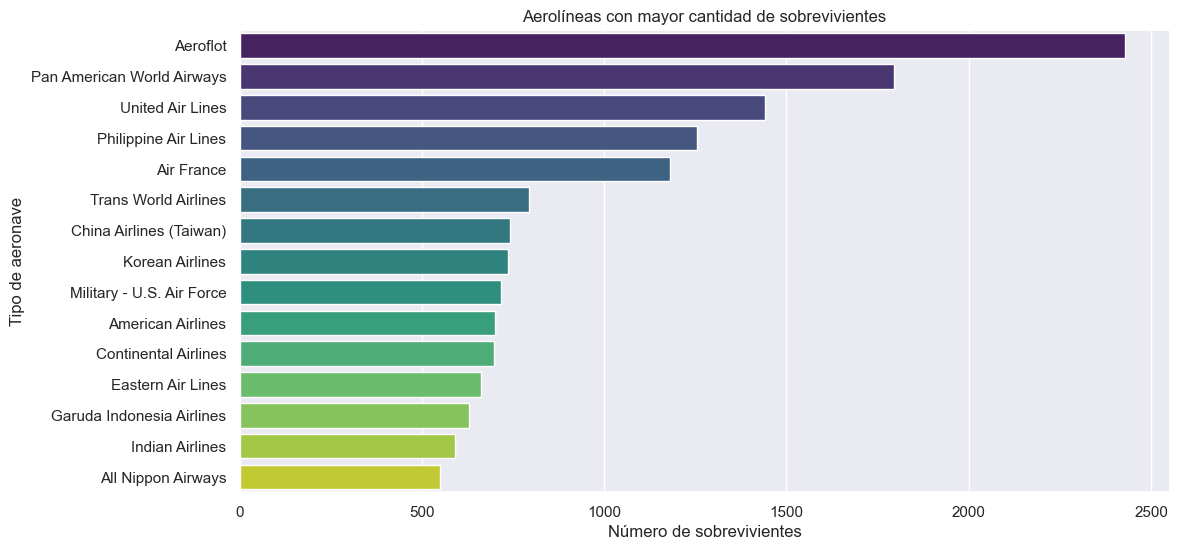

In [753]:
# Calculamos los sobrevivientes por aeronave
survivors_by_airline = df.groupby('airline_operator')['survivors'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_airline_survivors = survivors_by_airline.nlargest(15, 'survivors')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='survivors', y='airline_operator', data=top_airline_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aerolíneas con mayor cantidad de sobrevivientes')
plt.show()

In [754]:
# Observamos los valores
top_airline_survivors

,airline_operator,survivors
80,Aeroflot,2429.0
1594,Pan American World Airways,1794.0
2143,United Air Lines,1442.0
1639,Philippine Air Lines,1256.0
188,Air France,1181.0
2051,Trans World Airlines,793.0
625,China Airlines (Taiwan),743.0
1065,Korean Airlines,737.0
1399,Military - U.S. Air Force,718.0
353,American Airlines,700.0


In [755]:
# Pese a tener la cantidad mayor de accidentes y fatalidades, Aeroflot posee el mayor número de sobrevivientes

In [756]:
lista_nombres_aerolineas = top_airline_survivors['airline_operator'].tolist()
lista_nombres_aerolineas

['Aeroflot',
 'Pan American World Airways',
 'United Air Lines',
 'Philippine Air Lines',
 'Air France',
 'Trans World Airlines',
 'China Airlines (Taiwan)',
 'Korean Airlines',
 'Military - U.S. Air Force',
 'American Airlines',
 'Continental Airlines',
 'Eastern Air Lines',
 'Garuda Indonesia Airlines',
 'Indian Airlines',
 'All Nippon Airways']

##### Cuáles aeronaves resultaron más seguras?

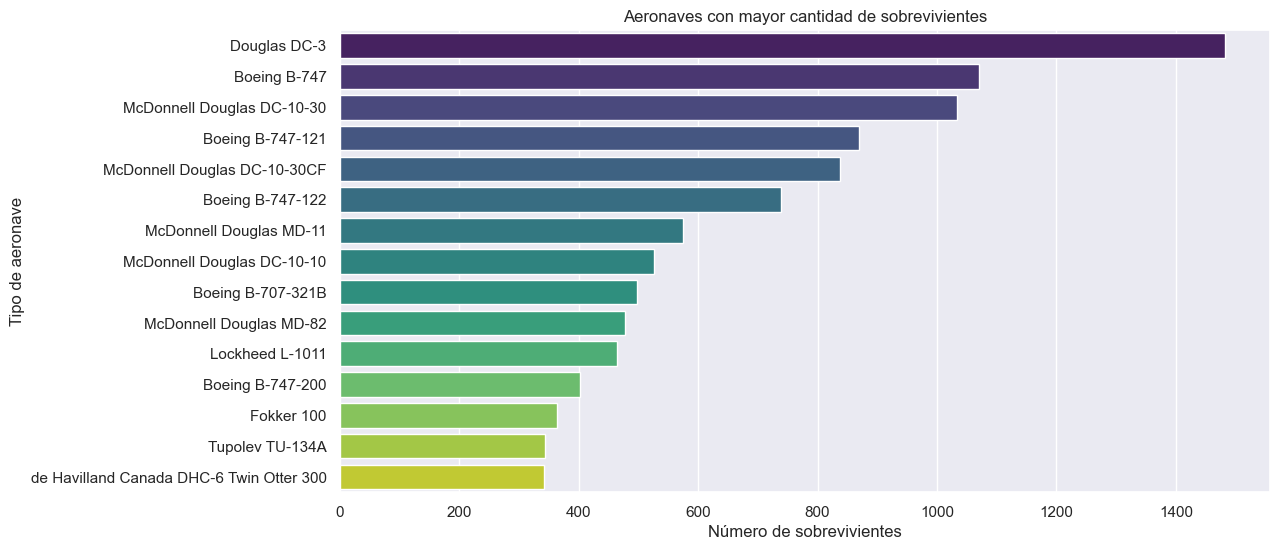

In [757]:
# Calculamos los sobrevivientes por aeronave
survivors_by_aircraft = df.groupby('aircraft_type')['survivors'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_aircraft_survivors = survivors_by_aircraft.nlargest(15, 'survivors')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='survivors', y='aircraft_type', data=top_aircraft_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de sobrevivientes')
plt.show()


In [758]:
# Observamos los valores
top_aircraft_survivors

,aircraft_type,survivors
1129,Douglas DC-3,1483.0
585,Boeing B-747,1070.0
1851,McDonnell Douglas DC-10-30,1033.0
586,Boeing B-747-121,870.0
1852,McDonnell Douglas DC-10-30CF,838.0
589,Boeing B-747-122,739.0
1891,McDonnell Douglas MD-11,574.0
1850,McDonnell Douglas DC-10-10,527.0
455,Boeing B-707-321B,497.0
1894,McDonnell Douglas MD-82,477.0


In [759]:
# El Douglas DC-3, además de resultar el avión con mayor número de fatalidades y accidentes, es el que tiene la mayor cantidad de sobrevivientes

##### Qué marca resultó más segura?

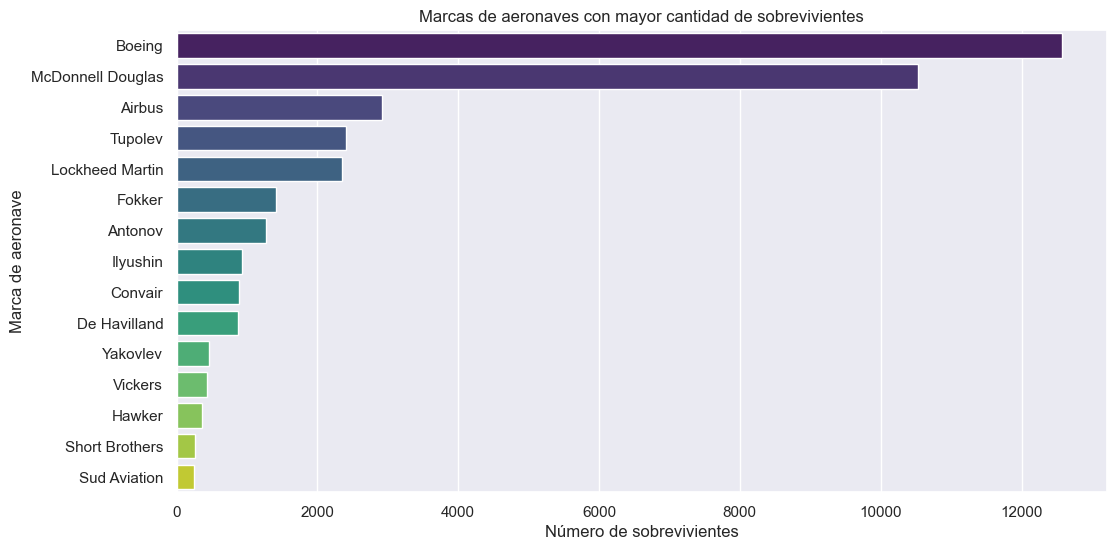

In [760]:
# Filtramos 'other' del recuento
data_filtered = df[df['brand'] != 'other']

# Calculamos los sobrevivientes por marca
survivors_by_brand = data_filtered.groupby('brand')['survivors'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_brands_survivors = survivors_by_brand.nlargest(15, 'survivors')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='survivors', y='brand', data=top_brands_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Marca de aeronave')
plt.title('Marcas de aeronaves con mayor cantidad de sobrevivientes')
plt.show()

In [761]:
# Observamos los valores
top_brands_survivors

,brand,survivors
8,Boeing,12578.0
25,McDonnell Douglas,10534.0
0,Airbus,2923.0
37,Tupolev,2408.0
24,Lockheed Martin,2353.0
17,Fokker,1416.0
1,Antonov,1273.0
21,Ilyushin,927.0
12,Convair,894.0
14,De Havilland,870.0


In [762]:
# La marca más segura resultó Boeing

In [763]:
lista_nombres_marcas = top_brands_survivors['brand'].tolist()
lista_nombres_marcas

['Boeing',
 'McDonnell Douglas',
 'Airbus',
 'Tupolev',
 'Lockheed Martin',
 'Fokker',
 'Antonov',
 'Ilyushin',
 'Convair',
 'De Havilland',
 'Yakovlev',
 'Vickers',
 'Hawker',
 'Short Brothers',
 'Sud Aviation']

##### Las aerolíneas más seguras tenían las marcas más seguras?

In [764]:
# Hacemos una tabla cruzada para mostrar cantidad de marcas por aerolínea
tabla_cruzada = pd.crosstab(df['airline_operator'], df['brand'], margins=True, margins_name="Total")

# Filtramos la tabla cruzada por las aerolíneas y marcas más seguras
tabla_cruzada_filtrada = tabla_cruzada.loc[lista_nombres_aerolineas, lista_nombres_marcas]
tabla_cruzada_filtrada

brand,Boeing,McDonnell Douglas,Airbus,Tupolev,Lockheed Martin,Fokker,Antonov,Ilyushin,Convair,De Havilland,Yakovlev,Vickers,Hawker,Short Brothers,Sud Aviation
airline_operator,,,,,,,,,,,,,,,
Aeroflot,1,4,0,57,0,0,65,69,0,0,23,0,0,0,0
Pan American World Airways,25,3,0,0,7,0,0,0,0,0,0,0,0,0,0
United Air Lines,15,25,0,0,0,0,0,0,1,0,0,2,0,0,0
Philippine Air Lines,2,13,2,0,0,5,0,0,0,2,0,0,4,0,0
Air France,5,16,5,0,6,0,0,0,0,0,0,1,0,0,1
Trans World Airlines,9,0,0,0,7,0,0,0,1,0,0,0,0,0,0
China Airlines (Taiwan),7,3,2,0,0,0,0,0,0,0,0,0,0,0,1
Korean Airlines,6,1,1,0,0,2,0,0,0,0,0,0,0,0,0
Military - U.S. Air Force,33,34,0,0,42,0,0,0,7,1,0,0,0,0,0


In [765]:
# Podemos afirmar en base a esta tabla que las aerolineas más seguras, históricamente tuvieron dentro de su flota Boeing y Douglas principalmente
# Esto indica que las aerolíneas más seguras compraron las aerolíneas más seguras. No podríamos atribuir la causa de los accidentes al tipo de aeronave

### 5) Análisis temporal

#### Evolución de accidentes a lo largo de los años

##### a) Primer y último vuelo del dataset

In [766]:
# Obtenemos el vuelo más antiguo
vuelo_mas_antiguo = df[df['date'] == df['date'].min()]
num_vuelo_antiguo = vuelo_mas_antiguo['flight_no'].values[0]
operador_antiguo = vuelo_mas_antiguo['airline_operator'].values[0]
fecha_antigua = vuelo_mas_antiguo['date'].values[0]

# Obtenemos el vuelo más reciente
vuelo_mas_reciente = df[df['date'] == df['date'].max()]
num_vuelo_reciente = vuelo_mas_reciente['flight_no'].values[0]
operador_reciente = vuelo_mas_reciente['airline_operator'].values[0]
fecha_reciente = vuelo_mas_reciente['date'].values[0]

# Imprimimos los resultados
print("Vuelo más antiguo:")
print("Número de vuelo:", num_vuelo_antiguo)
print("Operador de la aerolínea:", operador_antiguo)
print("Fecha:", fecha_antigua)
print()
print("Vuelo más reciente:")
print("Número de vuelo:", num_vuelo_reciente)
print("Operador de la aerolínea:", operador_reciente)
print("Fecha:", fecha_reciente)

Vuelo más antiguo:
Número de vuelo: 
Operador de la aerolínea: Military - U.S. Army
Fecha: 1908-09-17T00:00:00.000000000

Vuelo más reciente:
Número de vuelo: 251
Operador de la aerolínea: Kamchatka Aviation Enterprise
Fecha: 2021-07-06T00:00:00.000000000


##### b) Resultan más seguros los vuelos en los últimos años?

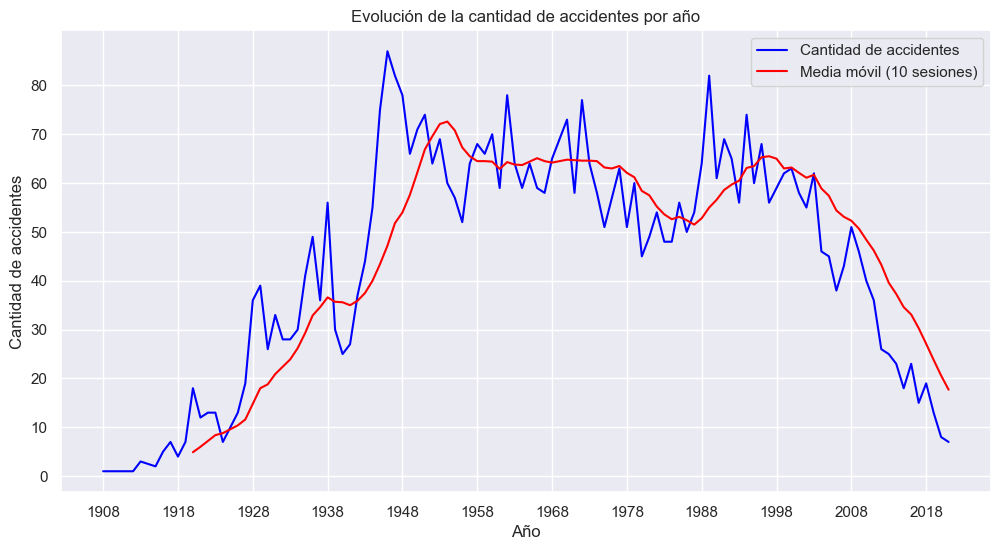

In [767]:
# Extraemos el año de la columna 'date'
df['year'] = pd.to_datetime(df['date']).dt.year

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('year').size().reset_index(name='Cantidad de accidentes')

# Calculamos la media móvil de 10 sesiones
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()

# Creamos el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='year', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='year', y='Media móvil', color='red', label='Media móvil (10 sesiones)')

# Establecemos separación del eje x cada 10 años
plt.xticks(range(min(accidents_by_year['year']), max(accidents_by_year['year'])+1, 10))

# Establecemos separación del eje y cada 10 unidades
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines
plt.grid(True)

# Establecemos etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico
plt.title('Evolución de la cantidad de accidentes por año')

# Mostramos el gráfico
plt.show()


In [768]:
# Podemos observar que a partir de 1908 la tendencia comenzó fuertemente alcista hasta llegar a 1946 donde tuvimos el máximo histórico
# La tendencia marcó una consolidación entre 1946 y el año 2000, con máximos entre 70 y 80
# Para finalmente comenzar una tendencia a la baja a partir de 1990
# Para los últimos años del dataset, la cantidad de accidentes se encuentra en mínimos históricos
# La media móvil de 10 años resulta un factor importante a considerar, puesto que todas las veces que hemos estado por encima de la misma, los accidentes han sido altos en cantidad

# En los últimos años los vuelos resultaron más seguros que durante mediados del siglo XX

##### c) Cuál fue el año con mayor cantidad de accidentes?

In [769]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('year').size().reset_index(name='accident_count')

# Ordenamos el DataFrame por la columna 'Cantidad de accidentes' de forma descendente
top_10_years = accidents_by_year.sort_values(by='accident_count', ascending=False).head(10)

# Mostramos el DataFrame con el top 10 de años ordenados por cantidad de accidentes
top_10_years


,year,accident_count
35,1946,87
36,1947,82
78,1989,82
37,1948,78
51,1962,78
61,1972,77
34,1945,75
40,1951,74
83,1994,74
59,1970,73


In [770]:
# El año con mayor cantidad de accidentes fue 1946 con 87

##### d) Cuál ha sido el mes histórico con mayor cantidad de accidentes?

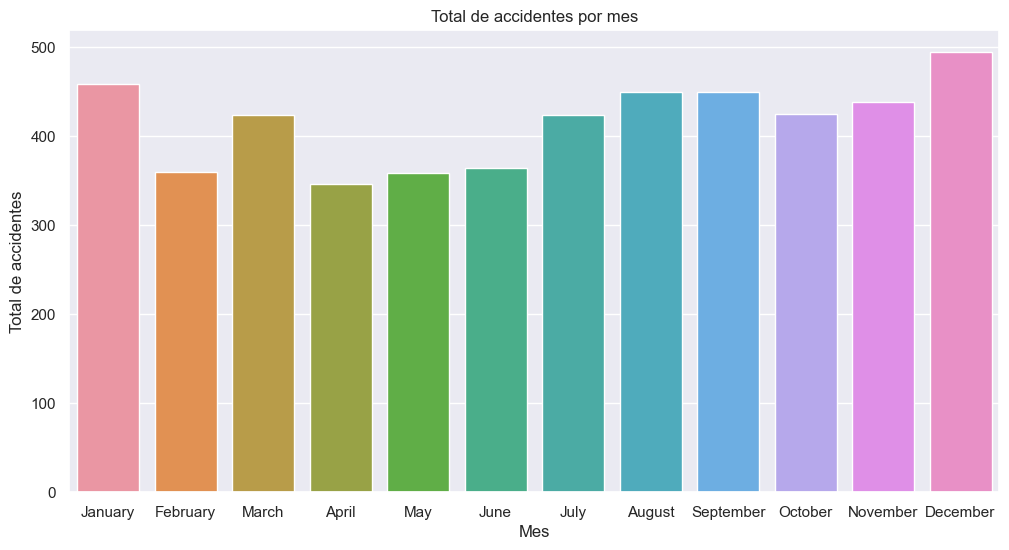

In [771]:
import calendar

# Extraemos el mes de la columna 'date'
df['month'] = pd.to_datetime(df['date']).dt.month

# Obtenemos los nombres de los meses
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

# Agrupamos por mes y contamos la cantidad de accidentes
accidents_by_month = df.groupby('month').size().reset_index(name='accident_count')

# Ordenamos los meses de forma cíclica
months_order = list(calendar.month_name)[1:]  # Lista de nombres de los meses sin el primer elemento (vacío)
accidents_by_month['month'] = pd.Categorical(accidents_by_month['month'], categories=months_order, ordered=True)
accidents_by_month = accidents_by_month.sort_values('month')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_month, x='month', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')

# Establecemos título en el gráfico
plt.title('Total de accidentes por mes')

# Mostramos el gráfico
plt.show()

In [772]:
df_month = accidents_by_month.sort_values('accident_count', ascending = False)
df_month

,month,accident_count
2,December,494
4,January,458
1,August,449
11,September,449
9,November,438
10,October,425
7,March,423
5,July,423
6,June,364
3,February,359


In [773]:
df_month.describe()

,accident_count
count,12.000000
mean,415.500000
std,47.580554
min,346.000000
25%,362.750000
50%,424.000000
75%,449.000000
max,494.000000


In [774]:
# El mes de mayor cantidad de accidentes fue Diciembre con 494. Históricamente los meses tienen cantidades similares y los datos no están muy disperos entre sí
# La media de accidentes por mes está en 415

##### e) Cuál ha sido el día histórico con mayor cantidad de accidentes?

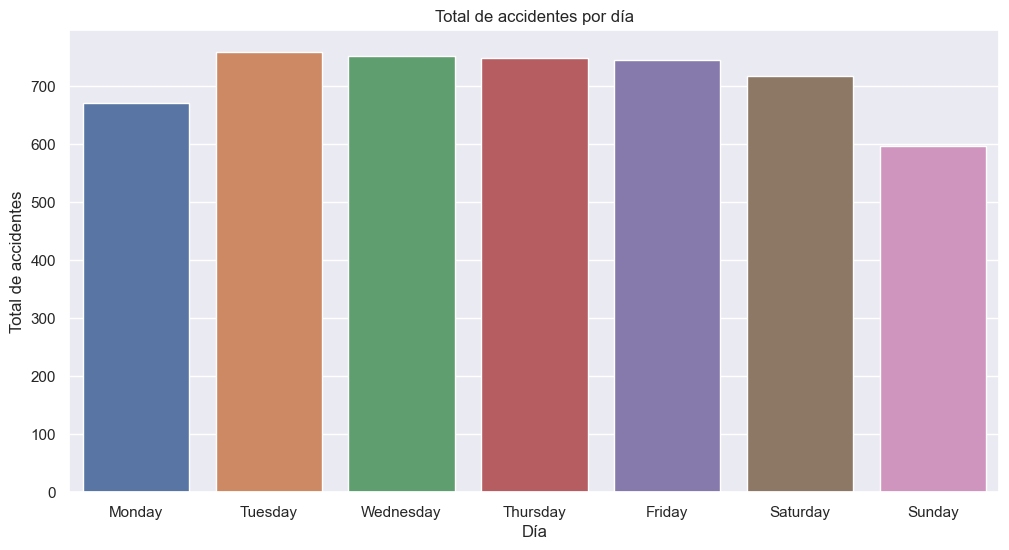

In [775]:
# Extraemos el día de la columna 'date'
df['day'] = pd.to_datetime(df['date']).dt.dayofweek

# Obtenemos los nombres de los días de la semana
df['day'] = df['day'].apply(lambda x: calendar.day_name[x])

# Agrupamos por día y contamos la cantidad de accidentes
accidents_by_day = df.groupby('day').size().reset_index(name='accident_count')

# Ordenamos los días de la semana de forma cíclica
days_order = list(calendar.day_name)
accidents_by_day['day'] = pd.Categorical(accidents_by_day['day'], categories=days_order, ordered=True)
accidents_by_day = accidents_by_day.sort_values('day')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='day', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Día')
plt.ylabel('Total de accidentes')

# Establecemos título del gráfico
plt.title('Total de accidentes por día')

# Mostramos el gráfico
plt.show()



In [776]:
df_day = accidents_by_day.sort_values('accident_count', ascending = False)
df_day

,day,accident_count
5,Tuesday,758
6,Wednesday,751
4,Thursday,748
0,Friday,744
2,Saturday,717
1,Monday,671
3,Sunday,597


In [777]:
df_day.describe()

,accident_count
count,7.000000
mean,712.285714
std,59.002018
min,597.000000
25%,694.000000
50%,744.000000
75%,749.500000
max,758.000000


In [778]:
# El día martes es el día con mayor cantidad de accidentes con 785. No obstante los valores son similares y no están muy dispersos entre sí.
# La media de accidentes por día está en 712

##### f) Cuál ha sido la hora histórica con mayor cantidad de accidentes?

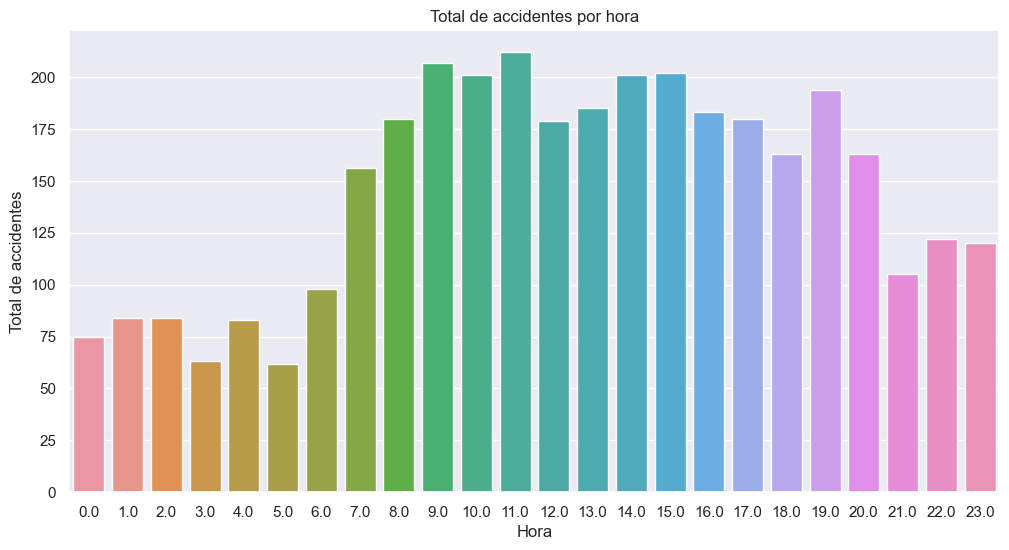

In [779]:
import re

# Utilizar expresiones regulares para extraer la hora de la columna 'time'
df['hour'] = df['time'].apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None)

# Convertir la columna 'hour' a tipo numérico
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')

# Agrupar por hora y contar la cantidad de accidentes
accidents_by_hour = df.groupby('hour').size().reset_index(name='accident_count')

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_hour, x='hour', y='accident_count')

# Establecer etiquetas de los ejes
plt.xlabel('Hora')
plt.ylabel('Total de accidentes')

# Establecer título del gráfico
plt.title('Total de accidentes por hora')

# Mostrar el gráfico
plt.show()


In [780]:
df_hour = accidents_by_hour.sort_values('accident_count', ascending = False)
df_hour

,hour,accident_count
11,11.0,212
9,9.0,207
15,15.0,202
10,10.0,201
14,14.0,201
19,19.0,194
13,13.0,185
16,16.0,183
17,17.0,180
8,8.0,180


In [781]:
# La hora en la que ocurrieron la mayor cantidad de accidentes fue a las 11:00 con 212 accidentes

In [782]:
df.shape

(4986, 23)

### 6) KPI's

##### a) Tasa anual de mortalidad. Objetivo: reducir en un 5% la tasa, año a año

In [783]:
# Calculamos la mortalidad para cada vuelo
df['mortality_rate'] = df['total_fatalities'] / df['total_aboard']

# Agrupamos por año
mortality_by_year = df.groupby('year').agg({'total_fatalities': 'sum', 'total_aboard': 'sum'})

# Calculamos la tasa de mortalidad por año
mortality_by_year['mortality_rate'] = mortality_by_year['total_fatalities'] / mortality_by_year['total_aboard']

# Observamos los valores
mortality_by_year


,total_fatalities,total_aboard,mortality_rate
year,,,
1908,1,2.0,0.500000
1909,1,1.0,1.000000
1912,5,5.0,1.000000
1913,43,49.0,0.877551
1915,36,60.0,0.600000
...,...,...,...
2017,214,245.0,0.873469
2018,874,1239.0,0.705408
2019,305,432.0,0.706019


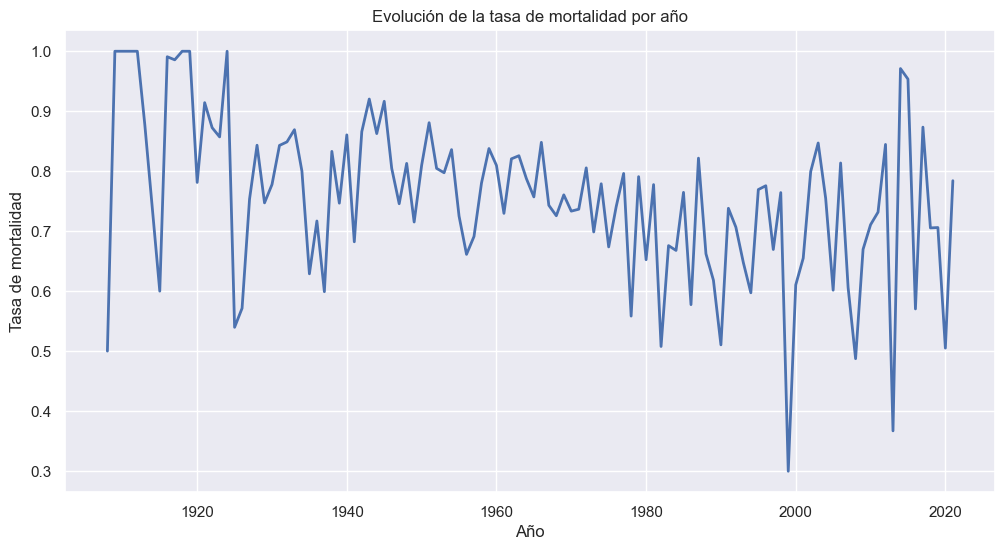

In [784]:
# Graficamos

# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Configuramos el estilo de Seaborn
sns.set(style="darkgrid")

# Creamos el gráfico de líneas 
sns.lineplot(data=mortality_by_year, x=mortality_by_year.index, y='mortality_rate', linewidth=2, markers=False)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.title('Evolución de la tasa de mortalidad por año')

# Mostrar el gráfico
plt.show()


In [785]:
# Podemos observar que la tasa anual de mortalidad disminuyó considerablemente desde 1940 hasta 1980
# A partir de 1980 ha tenido picos de 0.9 y 0.95 y mínimos de 0.3 y 0.35
# Podemos decir que las tasas han sido bajas cuando han estado por debajo de 0.5, lo cual ha sucedido en pocos años

In [786]:
# Calculamos la mortalidad para cada vuelo
df['mortality_rate'] = df['total_fatalities'] / df['total_aboard']

# Agrupamos por año
mortality_by_year = df.groupby('year').agg({'total_fatalities': 'sum', 'total_aboard': 'sum'})

# Calculamos la tasa de mortalidad por año
mortality_by_year['mortality_rate'] = mortality_by_year['total_fatalities'] / mortality_by_year['total_aboard']

# Filtramos a partir de 2010
mortality_by_year_filtrado = mortality_by_year[mortality_by_year.index >= 2010]

# Calculamos la variación interanual en la tasa de mortalidad
mortality_by_year_filtrado['mortality_rate_change'] = mortality_by_year_filtrado['mortality_rate'].pct_change()

# Observamos los valores
mortality_by_year_filtrado

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_10908\3609007640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_by_year_filtrado['mortality_rate_change'] = mortality_by_year_filtrado['mortality_rate'].pct_change()


,total_fatalities,total_aboard,mortality_rate,mortality_rate_change
year,,,,
2010,1044,1469.0,0.710688,NaN
2011,720,984.0,0.731707,0.029577
2012,587,695.0,0.844604,0.154293
2013,287,782.0,0.367008,-0.565468
2014,1142,1176.0,0.971088,1.645962
2015,759,796.0,0.953518,-0.018094
2016,515,903.0,0.570321,-0.401877
2017,214,245.0,0.873469,0.531540
2018,874,1239.0,0.705408,-0.192407


In [787]:
# Se puede observar una tendencia bajista desde 2014 pero actualmente la tasa se encuentra en aumento
# Los años en los que la tasa ha disminuído, han tenido un porcentaje de cambio superior a un 20%

##### b) Tasa anual de supervivencia. Objetivo: aumentar la tasa para aerolineas con alta siniestralidad en los próximos años

In [788]:
# Calculamos la supervivencia para cada vuelo
df['survival_rate'] = df['survivors'] / df['total_aboard']

# Agrupamos por año
survival_by_year = df.groupby('year').agg({'survivors': 'sum', 'total_aboard': 'sum'})

# Calculamos la tasa de mortalidad por año
survival_by_year['survival_rate'] = survival_by_year['survivors'] / survival_by_year['total_aboard']

# Observamos los valores
survival_by_year

,survivors,total_aboard,survival_rate
year,,,
1908,1.0,2.0,0.500000
1909,0.0,1.0,0.000000
1912,0.0,5.0,0.000000
1913,6.0,49.0,0.122449
1915,24.0,60.0,0.400000
...,...,...,...
2017,31.0,245.0,0.126531
2018,365.0,1239.0,0.294592
2019,127.0,432.0,0.293981


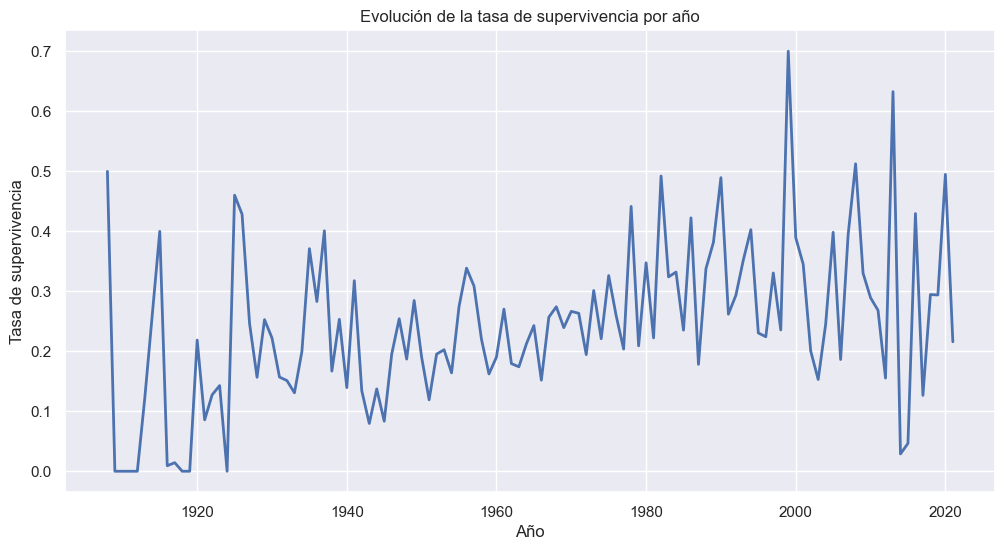

In [789]:
# Graficamos

# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Configuramos el estilo de Seaborn
sns.set(style="darkgrid")

# Creamos el gráfico de líneas 
sns.lineplot(data=survival_by_year, x=survival_by_year.index, y='survival_rate', linewidth=2, markers=False)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Tasa de supervivencia')
plt.title('Evolución de la tasa de supervivencia por año')

# Mostrar el gráfico
plt.show()

In [790]:
# Podemos observar que la tasa anual de supervivencia aumentó considerablemente desde 1940 hasta 1998
# A partir de 1998 ha tenido picos de 0.7 y 0.65 y mínimos de 0.15 y 0.05
# Podemos decir que las tasas han sido altas cuando han estado por encima de 0.4, lo cual ha sucedido en muchos años
# Se puede observar que no hay una tendencia definida actualmente

# El análisis puede abrirse para considerar las aerolíneas con mayor cantidad de accidentes y la evolución de la tasa anual de supervivencia para cada una de ellas (Ver Dashboard Power BI)

##### c) Media móvil de accidentes cada 10 años. Objetivo: mantenerse por debajo de la misma los próximos años

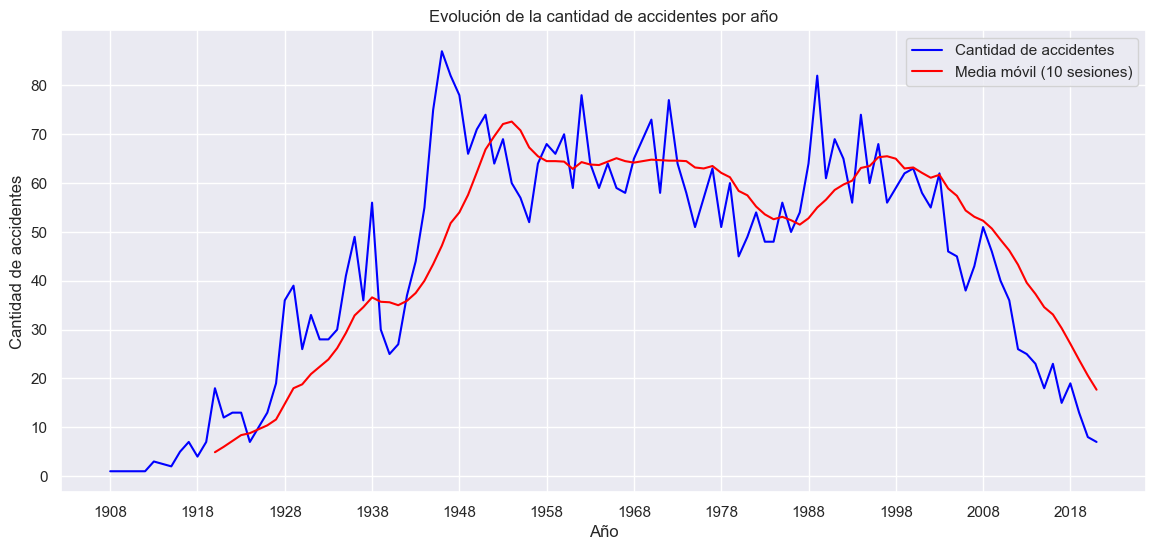

In [791]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('year').size().reset_index(name='Cantidad de accidentes')

# Calculamos la media móvil de 10 sesiones
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()

# Creamos el gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=accidents_by_year, x='year', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='year', y='Media móvil', color='red', label='Media móvil (10 sesiones)')

# Establecemos separación del eje x cada 10 años
plt.xticks(range(min(accidents_by_year['year']), max(accidents_by_year['year'])+1, 10))

# Establecemos separación del eje y cada 10 unidades
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines
plt.grid(True)

# Establecemos etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico
plt.title('Evolución de la cantidad de accidentes por año')

# Mostramos el gráfico
plt.show()

In [792]:
# Podemos definir que aquellos años donde la cantidad de accidentes ha estado por encima de la media móvil de 10 años, han sido los más trágicos
# En tanto que los años que hemos estado por debajo, han sido los años de menor siniestralidad
# Es importante destacar los avances de la tecnología en el análisis, puesto que con los recursos disponibles, la esperanza a mediados del siglo XX era distinta a la actualidad
# Por ende y basándonos en el gráfico, es importante mantenernos siempre por debajo de la media móvil de 10 años

In [793]:
accidents_by_year

,year,Cantidad de accidentes,Media móvil
0,1908,1,NaN
1,1909,1,NaN
2,1912,1,NaN
3,1913,3,NaN
4,1915,2,NaN
...,...,...,...
106,2017,15,30.3
107,2018,19,27.1
108,2019,13,23.8
109,2020,8,20.6


In [794]:
# Actualmente la media móvil de 10 años se encuentra en un valor de 16.30 para el año 2021 que es el año en el que se encuentra el último registro del dataset

##### d) Cantidad de Accidentes en Estados Unidos. Objetivo: reducir en un 5% la cantidad cada año

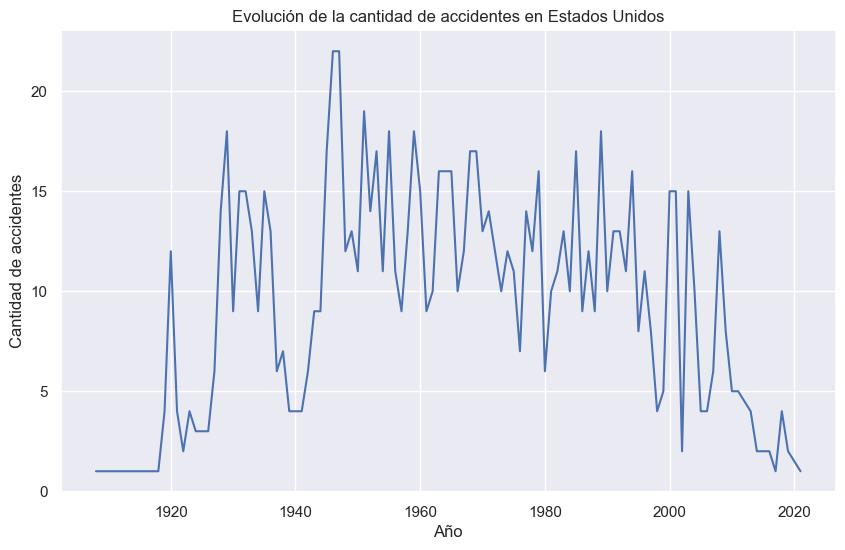

In [795]:
# Filtramos el DataFrame solo para los accidentes en Estados Unidos
df_usa = df[df['country'] == 'United States']

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df_usa.groupby('year').size().reset_index(name='count')

# Configuramos el estilo
sns.set(style="darkgrid")

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=accidents_by_year, x='year', y='count')

# Configuramos el título y las etiquetas de los ejes
plt.title('Evolución de la cantidad de accidentes en Estados Unidos')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Mostrar el gráfico
plt.show()

In [796]:
# Podemos observar que pese a ser el país con mayor número de accidentes en toda la historia, la cantidad de accidentes se ha reducido con el paso de los años
# Recién a partir de 1994 se puede observar una clara tendencia a la baja

In [797]:
# Filtramos el DataFrame solo para los accidentes en Estados Unidos y a partir de 1994
df_usa_filtered = df[(df['country'] == 'United States') & (df['year'] >= 1994)]

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df_usa_filtered.groupby('year').size().reset_index(name='accident_count')

# Calculamos la variación anual de accidentes
accidents_by_year['accident_variation'] = accidents_by_year['accident_count'].pct_change()

# Creamos un nuevo DataFrame con los resultados
accidents_variation_df = accidents_by_year[['year','accident_count', 'accident_variation']].copy()

# Observamos el dataframe
accidents_variation_df


,year,accident_count,accident_variation
0,1994,16,NaN
1,1995,8,-0.500000
2,1996,11,0.375000
3,1997,8,-0.272727
4,1998,4,-0.500000
5,1999,5,0.250000
6,2000,15,2.000000
7,2001,15,0.000000
8,2002,2,-0.866667
9,2003,15,6.500000


In [798]:
# Los años en los que se ha visualizado una disminución interanual, han tenido un porcentaje mayor al 0.20 por lo que se cumple el objetivo de reducir la cantidad de accidentes

In [814]:
df.shape

(4986, 25)

### 7) Exportación a csv y mysql

Archivo .csv

In [800]:
df.to_csv('air_accidents.csv', index=False, sep = ';')

MYSql

In [409]:
#pip install mysql-connector-python

In [811]:
# Importamos la librería necesaría
import mysql.connector

# Establecemos la conexión a MySQL
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='####'
)

# Instanciamos el cursor y creamos la base de datos 'air_flights' si no existe
cursor = cnx.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS air_flights")
cursor.execute("USE air_flights")

# Creamos la tabla 'air_accidents'
cursor.execute("""
    CREATE TABLE IF NOT EXISTS air_accidents (
        date DATE,
        time TIME,
        location VARCHAR(250),
        airline_operator VARCHAR(250),
        flight_no VARCHAR(250),
        route VARCHAR(250),
        aircraft_type VARCHAR(250),
        total_aboard INT,
        passengers_aboard INT,
        crew_aboard INT,
        total_fatalities INT,
        passengers_fatalities INT,
        crew_fatalities INT,
        summary VARCHAR(5000),
        country VARCHAR(150),
        surface VARCHAR(150),
        category VARCHAR(150),
        brand VARCHAR(150),
        survivors INT,
        year INT,
        month VARCHAR(50),
        day VARCHAR(50),
        hour VARCHAR(50),
        mortality_rate FLOAT,
        survival_rate FLOAT
    )
""")

# Definimos los datos a utilizar a utilizar
data = df.to_dict('records')

# Escribimos la consulta SQL para insertar un solo registro
insert_query = """
    INSERT INTO air_accidents
    (date, time, location, airline_operator, flight_no, route, aircraft_type, total_aboard, passengers_aboard, crew_aboard, total_fatalities, passengers_fatalities, crew_fatalities, summary, country, surface, category, brand, survivors, year, month, day, hour, mortality_rate, survival_rate)
    VALUES
    (%(date)s, %(time)s, %(location)s, %(airline_operator)s, %(flight_no)s, %(route)s, %(aircraft_type)s, %(total_aboard)s, %(passengers_aboard)s, %(crew_aboard)s, %(total_fatalities)s, %(passengers_fatalities)s, %(crew_fatalities)s, %(summary)s, %(country)s, %(surface)s, %(category)s, %(brand)s, %(survivors)s, %(year)s, %(month)s, %(day)s, %(hour)s, %(mortality_rate)s, %(survival_rate)s)
"""

# Ejecutamos la inserción de datos para cada registro
for row in data:
    # Reemplazar los valores NaN por None en el diccionario
    row = {key: None if pd.isna(value) else value for key, value in row.items()}
    cursor.execute(insert_query, row)

# Confirmamos los cambios en la base de datos
cnx.commit()

# Cerrar la conexión
cursor.close()
cnx.close()

In [812]:
# Cerrar la conexión nuevamente por si tenemos procesos activos
cursor.close()
cnx.close()